In [33]:
# Multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [69]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_columns', 100)

In [70]:
# Fonte: Radar IDHM (PNADS 2011-2015) ---- http://www.atlasbrasil.org.br/2013/pt/download/
idh = pd.read_csv('Indicadores Atlas.csv', encoding='ISO-8859-1', delimiter=';')

idh.head()

ANO NOME_AGREGA  AGREGA ESPVIDA  MORT1 T_ENV RAZDEP ANOSEST T_ANALF15M  \
0  2011          RO      11   70,32  22,24  5,29  45,77    7,60       9,74   
1  2012          RO      11   70,53  21,75  4,99  44,60    7,94       8,57   
2  2013          RO      11   70,74  21,27  5,60  43,78    7,80       8,56   
3  2014          RO      11   70,94  20,82  5,76  45,20    8,31       8,34   
4  2015          RO      11   71,14  20,38  7,13  45,02    8,35       8,01   

  T_ANALF18M T_ANALF25M T_ATRASO_2_BASICO T_ATRASO_2_FUND T_FLBAS T_FLFUND  \
0      10,66      12,68             23,15           19,07   90,09    94,56   
1       9,26      11,35             22,21           16,47   93,47    97,41   
2       9,24      11,09             20,43           16,87   93,52    96,72   
3       8,88      10,66             15,55           13,10   93,39    97,13   
4       8,65      10,06             17,07           12,24   91,70    96,34   

  T_FLMED T_FLSUPER T_FREQ5A6 T_FREQ6A14 T_FREQ15A17 T_FREQ18A24 T_FUND11A13  \
0   45,80     10,70     70,03      95,77       80,47       25,25       87,05   
1   46,94     11,55     81,58      98,66       82,08       23,32       88,19   
2   49,40     14,25     82,84      98,19       83,45       28,50       87,84   
3   50,14     16,90     90,54      98,84       79,48       29,72       87,96   
4   45,27     15,37     88,57      97,46       80,10       25,30       90,43   

  T_FUND15A17 T_FUND18M T_FUND18A24 T_FUND25M T_MED18A20 T_MED25M T_SUPER25M  \
0       56,52     55,73       77,74     51,02      41,12    32,87       8,96   
1       55,43     55,80       79,82     50,22      43,76    33,40       8,62   
2       57,31     54,40       79,59     48,95      41,84    32,02       8,87   
3       60,40     58,46       81,82     53,44      46,35    38,43      10,61   
4       57,21     57,26       78,91     53,14      42,64    37,34      10,68   

   R1040 R2040    RDPC   RDPC1   RDPC2   RDPC3   RDPC4    RDPC5   RDPC10  \
0  12,64  8,99  613,70  116,22  256,57  400,02  620,27  1675,90  2356,51   
1  11,86  8,49  633,34  126,82  268,76  430,03  665,67  1679,67  2344,94   
2  11,17  8,10  621,39  127,31  272,46  435,14  656,21  1618,23  2233,28   
3  10,90  7,86  667,41  146,53  294,82  452,72  691,37  1734,50  2405,33   
4  11,15  8,07  634,73  136,81  272,50  441,48  661,42  1651,35  2281,71   

    RDPCT   RIND  RMPOB    RPOB PRENTRAB  PIND  PMPOB   PPOB   GINI  THEIL  \
0  619,50  31,81  86,47  153,80    84,93  3,96  12,75  30,47  0,496  0,437   
1  639,64  34,00  90,31  153,67    83,39  3,07  11,28  27,37  0,482  0,405   
2  631,23  23,30  78,09  153,88    83,77  3,76  10,07  27,27  0,474  0,391   
3  674,18  31,64  77,96  158,97    83,47  3,01   7,19  22,73  0,469  0,380   
4  637,57  28,18  95,94  159,04    81,58  1,68   9,53  26,70  0,470  0,391   

       POP  POP5A6  POP6A14  POP6A17  POP11A13  POP15A17   POP15M   POP18M  \
0  1587902   58704   287138   405050    103310    117912  1249245  1131333   
1  1649946   56146   276266   380668     93798    104402  1269765  1165363   
2  1670217   49667   281864   383388    100021    101524  1302660  1201136   
3  1657696   55918   281102   369509     96227     88407  1308580  1220173   
4  1755648   56758   265852   374465     87530    108613  1349021  1240408   

   POP18A20  POP18A24   POP25M  POP65M     POPT   POPTOT I_ESCOLARIDADE  \
0     83742    199175   932158   89420  1573035  1587902          0,557   
1     92834    219635   945728   85458  1633695  1649946          0,558   
2     95435    213518   987618   97140  1644167  1670217          0,544   
3     96724    216118  1004055  101017  1641072  1657696          0,585   
4     88078    198580  1041828  126433  1747811  1755648          0,573   

  I_FREQ_PROP IDHM_E IDHM_L IDHM_R   IDHM  
0       0,637  0,609  0,755  0,697  0,687  
1       0,672  0,632  0,759  0,703  0,698  
2       0,675  0,628  0,762  0,699  0,696  
3       0,713  0,667  0,766  0,711  0,715  
4       0,697  0,653  0,769  0,703  0,

In [36]:
idh.isnull().mean()[idh.isnull().any()==True].sort_values(ascending=False)
idh.isnull().sum().sum()

Series([], dtype: float64)

0

In [37]:
# Transformação de floats

to_float = idh.select_dtypes(include='object').columns.drop('NOME_AGREGA')

for col in to_float:
    idh[col] = idh[col].str.replace(',', '.').astype('float')

idh.dtypes

ANO                    int64
NOME_AGREGA           object
AGREGA                 int64
ESPVIDA              float64
MORT1                float64
T_ENV                float64
RAZDEP               float64
ANOSEST              float64
T_ANALF15M           float64
T_ANALF18M           float64
T_ANALF25M           float64
T_ATRASO_2_BASICO    float64
T_ATRASO_2_FUND      float64
T_FLBAS              float64
T_FLFUND             float64
T_FLMED              float64
T_FLSUPER            float64
T_FREQ5A6            float64
T_FREQ6A14           float64
T_FREQ15A17          float64
T_FREQ18A24          float64
T_FUND11A13          float64
T_FUND15A17          float64
T_FUND18M            float64
T_FUND18A24          float64
T_FUND25M            float64
T_MED18A20           float64
T_MED25M             float64
T_SUPER25M           float64
R1040                float64
                      ...   
RDPCT                float64
RIND                 float64
RMPOB                float64
RPOB          

In [38]:
idh.iloc[:, :34].describe().T

count         mean          std      min      25%      50%  \
ANO                185.0  2013.000000     1.418051  2011.00  2012.00  2013.00   
AGREGA             185.0   910.432432  1548.214830    11.00    23.00    33.00   
ESPVIDA            185.0    74.219243     2.480149    69.07    72.20    74.33   
MORT1              185.0    15.784108     4.418957     9.19    11.75    15.83   
T_ENV              185.0     8.022216     1.857432     3.05     6.99     8.10   
RAZDEP             185.0    45.756432     5.392463    37.23    41.95    43.89   
ANOSEST            185.0     8.736757     1.148590     6.26     7.78     8.79   
T_ANALF15M         185.0     8.814324     5.718981     2.13     3.67     7.18   
T_ANALF18M         185.0     9.467189     6.204164     2.20     3.87     7.63   
T_ANALF25M         185.0    11.132486     7.367161     2.46     4.40     9.07   
T_ATRASO_2_BASICO  185.0    20.294865     6.707501     6.76    15.41    20.35   
T_ATRASO_2_FUND    185.0    16.558811     6.055927     4.82    11.64    16.47   
T_FLBAS            185.0    93.484162     1.450371    88.71    92.62    93.55   
T_FLFUND           185.0    96.639730     1.135127    92.55    96.04    96.71   
T_FLMED            185.0    52.380865     8.262882    32.63    45.95    52.23   
T_FLSUPER          185.0    17.221081     4.727408     6.35    14.29    17.25   
T_FREQ5A6          185.0    91.127622     5.988834    70.03    88.14    92.88   
T_FREQ6A14         185.0    98.180000     0.898455    94.87    97.87    98.36   
T_FREQ15A17        185.0    84.124324     3.163526    75.76    82.07    84.12   
T_FREQ18A24        185.0    31.755351     4.040990    23.32    29.17    31.32   
T_FUND11A13        185.0    87.529135     5.815276    66.92    83.79    87.96   
T_FUND15A17        185.0    61.639405     9.940544    39.47    54.12    61.56   
T_FUND18M          185.0    62.642649     8.665357    45.10    55.31    62.56   
T_FUND18A24        185.0    82.840000     6.487460    66.20    77.20    84.51   
T_FUND25M          185.0    58.649189     9.487648    40.23    51.02    58.69   
T_MED18A20         185.0    48.323892     8.920619    28.78    42.47    48.19   
T_MED25M           185.0    43.122162     9.261841    24.99    36.42    42.19   
T_SUPER25M         185.0    12.726216     5.086696     5.43     9.43    11.69   
R1040              185.0    13.880541     2.749643     8.16    11.96    13.71   
R2040              185.0     9.600973     1.810438     6.03     8.36     9.40   
RDPC               185.0   749.562270   282.325755   336.86   527.59   665.19   
RDPC1              185.0   145.997784    57.366441    46.12    94.08   138.13   
RDPC2              185.0   301.627892   108.491262   128.68   200.80   271.67   

                       75%      max  
ANO                2014.00  2015.00  
AGREGA             1500.00  5300.00  
ESPVIDA              76.62    79.07  
MORT1                18.77    27.95  
T_ENV                 9.25    12.26  
RAZDEP               49.33    61.78  
ANOSEST               9.61    11.21  
T_ANALF15M           13.76    21.97  
T_ANALF18M           15.07    23.87  
T_ANALF25M           18.10    28.52  
T_ATRASO_2_BASICO    25.08    39.66  
T_ATRASO_2_FUND      20.96    35.20  
T_FLBAS              94.62    96.16  
T_FLFUND             97.43    98.93  
T_FLMED              58.08    73.45  
T_FLSUPER            19.89    32.36  
T_FREQ5A6            95.58    99.45  
T_FREQ6A14           98.77    99.48  
T_FREQ15A17          86.18    91.92  
T_FREQ18A24          33.42    45.77  
T_FUND11A13          91.95    97.19  
T_FUND15A17          68.03    85.46  
T_FUND18M            69.71    79.84  
T_FUND18A24          87.11    94.55  
T_FUND25M            65.98    77.88  
T_MED18A20           54.28    66.86  
T_MED25M             50.41    65.70  
T_SUPER25M           15.19    30.69  
R1040                15.19    23.64  
R2040                10.43    16.34  
RDPC                932.21  1606.40  
RDPC1               199.46   283.63  
RDPC2     

In [39]:
idh.iloc[:, 34:].describe().T

count          mean           std         min          25%  \
RDPC3           185.0  4.606021e+02  1.568519e+02     206.430      316.370   
RDPC4           185.0  7.252357e+02  2.655247e+02     329.550      505.860   
RDPC5           185.0  2.114354e+03  8.673055e+02     975.510     1473.710   
RDPC10          185.0  3.044085e+03  1.229542e+03    1435.590     2185.170   
RDPCT           185.0  7.561171e+02  2.845567e+02     341.970      530.090   
RIND            185.0  2.921578e+01  1.086548e+01       4.830       20.250   
RMPOB           185.0  7.980081e+01  9.168948e+00      50.940       75.820   
RPOB            185.0  1.554159e+02  1.082050e+01     123.970      147.280   
PRENTRAB        185.0  7.664351e+01  5.247899e+00      64.000       72.670   
PIND            185.0  3.999459e+00  2.965594e+00       0.640        1.710   
PMPOB           185.0  1.095659e+01  7.484706e+00       1.840        4.370   
PPOB            185.0  2.749957e+01  1.372908e+01       7.200       14.280   
GINI            185.0  5.104432e-01  3.370876e-02       0.417        0.488   
THEIL           185.0  4.614432e-01  6.786166e-02       0.295        0.411   
POP             185.0  6.755046e+06  7.468855e+06  456998.000  2760072.000   
POP5A6          185.0  1.958794e+05  2.029775e+05   17355.000    80813.000   
POP6A14         185.0  9.905463e+05  1.028582e+06   81551.000   400182.000   
POP6A17         185.0  1.359960e+06  1.409023e+06  110965.000   540981.000   
POP11A13        185.0  3.436805e+05  3.558863e+05   24523.000   136864.000   
POP15A17        185.0  3.694141e+05  3.817230e+05   26787.000   143025.000   
POP15M          185.0  5.576474e+06  6.433636e+06  330246.000  2246546.000   
POP18M          185.0  5.207060e+06  6.055714e+06  300228.000  2098503.000   
POP18A20        185.0  3.539225e+05  3.777563e+05   26455.000   149428.000   
POP18A24        185.0  7.985307e+05  8.607514e+05   62822.000   334519.000   
POP25M          185.0  4.408529e+06  5.199023e+06  234819.000  1719478.000   
POP65M          185.0  6.425499e+05  7.943405e+05   18860.000   196580.000   
POPT            185.0  6.695456e+06  7.397928e+06  455453.000  2756412.000   
POPTOT          185.0  6.755046e+06  7.468855e+06  456998.000  2760072.000   
I_ESCOLARIDADE  185.0  6.264595e-01  8.662048e-02       0.451        0.553   
I_FREQ_PROP     185.0  7.215784e-01  6.183196e-02       0.569        0.679   
IDHM_E          185.0  6.873243e-01  6.282535e-02       0.553        0.647   
IDHM_L          185.0  8.203892e-01  4.128322e-02       0.735        0.787   
IDHM_R          185.0  7.191135e-01  5.753452e-02       0.601        0.673   
IDHM            185.0  7.422973e-01  5.026574e-02       0.635        0.701   

                        50%          75%           max  
RDPC3               426.360      596.790  7.881700e+02  
RDPC4               656.210      909.360  1.510800e+03  
RDPC5              1863.100     2511.160  5.034040e+03  
RDPC10             2652.410     3674.700  7.077430e+03  
RDPCT               666.260      937.220  1.608540e+03  
RIND                 28.970       38.320  5.096000e+01  
RMPOB                81.170       86.140  1.000300e+02  
RPOB                156.730      162.920  1.783600e+02  
PRENTRAB             77.460       80.680  8.927000e+01  
PIND                  3.010        5.750  1.583000e+01  
PMPOB                 8.230       17.190  3.284000e+01  
PPOB                 26.990       40.050  6.036000e+01  
GINI                  0.510        0.531  6.030000e-01  
THEIL                 0.461        0.501  6.670000e-01  
POP             3739407.000  8452632.000  4.207477e+07  
POP5A6           107545.000   267807.000  1.144831e+06  
POP6A14          551051.000  1366134.000  5.784502e+06  
POP6A17          757106.000  1907728.000  7.764527e+06  
POP11A13         196351.000   471410.000  2.084186e+06  
POP15A17         205830.000   515021.000  2.084954e+06  
POP15M          3024541.000  6832554.000  3.613029e+07  
POP18M          2831433.000  63

In [40]:
idh['ANO'].value_counts()

2015    37
2014    37
2013    37
2012    37
2011    37
Name: ANO, dtype: int64

In [41]:
idh_2011 = idh[idh['ANO']==2011].copy()
idh_2012 = idh[idh['ANO']==2012].copy()
idh_2013 = idh[idh['ANO']==2013].copy()
idh_2014 = idh[idh['ANO']==2014].copy()
idh_2015 = idh[idh['ANO']==2015].copy()

In [42]:
idh.columns

Index(['ANO', 'NOME_AGREGA', 'AGREGA', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP',
       'ANOSEST', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'T_FREQ5A6', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18M', 'T_FUND18A24',
       'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M', 'R1040', 'R2040',
       'RDPC', 'RDPC1', 'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'RDPCT',
       'RIND', 'RMPOB', 'RPOB', 'PRENTRAB', 'PIND', 'PMPOB', 'PPOB', 'GINI',
       'THEIL', 'POP', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18M', 'POP18A20', 'POP18A24', 'POP25M', 'POP65M', 'POPT',
       'POPTOT', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHM_E', 'IDHM_L', 'IDHM_R',
       'IDHM'],
      dtype='object')

In [43]:
# Importação do mapa base
mapa = gpd.read_file('Brasil.json', driver='JSON', crs={'init': 'epsg:4326'})

# Colunas adicionais com a área total e a área urbana em km² de cada estado
# Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_%C3%A1rea
# Segundo a fonte, os dados são de 2010, não foram encontrados dados mais atualizados na base do IBGE nem do Embrapa
mapa['AREA_KM2'] = np.array([164_123.040, 27_778.506, 142_828.521, 1_559_159.148, 564_733.177, 148_920.472,
                             5_779.999, 46_095.583, 340_111.783, 331_937.450, 903_366.192, 357_145.532,
                             586_522.122, 1_247_954.666, 56_585.000, 199_307.922, 98_311.616, 251_577.738,
                             43_780.172, 52_811.047, 281_730.223, 237_590.547, 224_300.506, 95_736.165,
                             248_222.362, 21_915.116, 277_720.520])
mapa['AREAURB_KM2'] = np.array([49.5, 202.1, 69.3, 395.1, 762.9, 471.2, 621.2, 427.6, 1_113.6, 512.3, 519.7,
                                441.3, 2_525.8, 730.6, 319.6, 1_603.7, 622.3, 277.1, 1_479.9, 269.6, 1_647,
                                226.1, 40.6, 878.2, 4_971, 118.7, 99.6])

In [44]:
mapa.head()

UF    ESTADO REGIAO                                           geometry  \
0  AC      Acre     NO  POLYGON ((-68.61895 -11.129709, -68.685345 -11...   
1  AL   Alagoas     NE  POLYGON ((-36.431494 -10.448229, -36.473394 -1...   
2  AP     Amapá     NO  (POLYGON ((-51.909319 -1.165791, -51.965264 -1...   
3  AM  Amazonas     NO  POLYGON ((-63.47887 2.198446, -63.439548 2.092...   
4  BA     Bahia     NE  (POLYGON ((-45.959232 -14.897264, -45.935374 -...   

      AREA_KM2  AREAURB_KM2  
0   164123.040         49.5  
1    27778.506        202.1  
2   142828.521         69.3  
3  1559159.148        395.1  
4   564733.177        762.9

***

# Educação
***

In [45]:
# Fonte: Censo Escolar (2015)  ----  http://portal.inep.gov.br/microdados
escolas = pd.read_csv('ESCOLAS.CSV', delimiter='|', encoding='ISO-8859-1')

escolas.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NU_ANO_CENSO  CO_ENTIDADE  \
0          2015     23181737   
1          2015     33134707   
2          2015     15543064   
3          2015     42142989   
4          2015     13072366   

                                         NO_ENTIDADE CO_ORGAO_REGIONAL  \
0                    AFONSO GONCALVES DE FREITAS EEF             00015   
1         JARDIM DOS PIRILAMPOS CRECHE MATERNAL LTDA             0170P   
2                             E M E F BRANCA DE NEVE             00010   
3  CENTRO MUNICIPAL DE EDUCACAO INFANTIL COMECINH...             00010   
4                          ESCOLA MUNICIPAL IPIRANGA             MI413   

   TP_SITUACAO_FUNCIONAMENTO DT_ANO_LETIVO_INICIO DT_ANO_LETIVO_TERMINO  \
0                          1           02/02/2015            18/12/2015   
1                          1           02/02/2015            18/12/2015   
2                          1           02/02/2015            24/12/2015   
3                          1           05/02/2015            18/12/2015   
4                          1           09/03/2015            18/12/2015   

   CO_REGIAO  CO_MESORREGIAO  CO_MICRORREGIAO          ...            \
0          2            2304            23020          ...             
1          3            3306            33018          ...             
2          1            1505            15015          ...             
3          4            4201            42004          ...             
4          1            1304            13013          ...             

   IN_ESP_EXCLUSIVA_MEDIO_INTEGR  IN_ESP_EXCLUSIVA_MEDIO_NORMAL  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   IN_COMUM_EJA_FUND  IN_COMUM_EJA_MEDIO  IN_COMUM_EJA_PROF  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   
3                0.0                 0.0                0.0   
4                0.0                 0.0                0.0   

   IN_ESP_EXCLUSIVA_EJA_FUND  IN_ESP_EXCLUSIVA_EJA_MEDIO  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   IN_ESP_EXCLUSIVA_EJA_PROF  IN_COMUM_PROF  IN_ESP_EXCLUSIVA_PROF  
0                        0.0            0.0                    0.0  
1                        0.0            0.0                    0.0  
2                        0.0            0.0                    0.0  
3                        0.0            0.0                    0.0  
4                        0.0            0.0                    0.0  

[5 rows x 166 columns]

In [46]:
escolas['TP_SITUACAO_FUNCIONAMENTO'].value_counts()

1    188689
2     42564
4     35117
3      6626
Name: TP_SITUACAO_FUNCIONAMENTO, dtype: int64

In [47]:
escolas.shape
# Segundo o dicionário da fonte: 1 - Em atividade 2 - Paralisada 3 - Extinta (ano do Censo) 4 - Extinta em anos anteriores
escolas = escolas[escolas['TP_SITUACAO_FUNCIONAMENTO']==1]
escolas.shape

(272996, 166)

(188689, 166)

In [48]:
escolas['CO_UF'].unique()

array([23, 33, 15, 42, 13, 43, 25, 22, 52, 31, 11, 41, 29, 12, 26, 21, 51,
       35, 53, 32, 17, 50, 16, 28, 27, 24, 14], dtype=int64)

In [49]:
# Transformar os códigos em siglas
escolas['CO_UF'] = escolas['CO_UF'].map({11: 'RO',
                                         12: 'AC',
                                         13: 'AM',
                                         14: 'RR',
                                         15: 'PA',
                                         16: 'AP',
                                         17: 'TO',
                                         21: 'MA',
                                         22: 'PI',
                                         23: 'CE',
                                         24: 'RN',
                                         25: 'PB',
                                         26: 'PE',
                                         27: 'AL',
                                         28: 'SE',
                                         29: 'BA',
                                         31: 'MG',
                                         32: 'ES',
                                         33: 'RJ',
                                         35: 'SP',
                                         41: 'PR',
                                         42: 'SC',
                                         43: 'RS',
                                         50: 'MS',
                                         51: 'MT',
                                         52: 'GO',
                                         53: 'DF'
                                         })

In [50]:
# Dataframe com o número de escolas por UF
count_escolas = pd.DataFrame(escolas['CO_UF'].value_counts()).reset_index().rename(columns={'index': 'UF', 'CO_UF': 'NUM_ESCOLAS'})
count_escolas

UF  NUM_ESCOLAS
0   SP        29443
1   BA        18597
2   MG        16539
3   MA        12701
4   PA        11270
5   RJ        11096
6   RS        10165
7   PR         9511
8   PE         9260
9   CE         8149
10  SC         6527
11  AM         5524
12  PB         5486
13  PI         5263
14  GO         4659
15  RN         3790
16  ES         3347
17  AL         3169
18  MT         2731
19  SE         2233
20  MS         1726
21  TO         1683
22  AC         1653
23  RO         1328
24  DF         1200
25  AP          840
26  RR          799

In [51]:
# Dataframe com as colunas desejadas para o estudo da educação
atlas_edu_2015 = idh_2015[idh_2015['NOME_AGREGA'].isin(count_escolas['UF'])][['NOME_AGREGA',
                                                                              'POPTOT',
                                                                              'POP6A17',
                                                                              'IDHM',
                                                                              'IDHM_E',
                                                                              'I_ESCOLARIDADE',
                                                                              'I_FREQ_PROP',
                                                                              'ANOSEST',
                                                                              'T_ANALF15M',
                                                                              'T_ANALF18M',
                                                                              'T_ANALF25M',
                                                                              'T_ATRASO_2_BASICO',
                                                                              'T_ATRASO_2_FUND',
                                                                              'T_FLBAS',
                                                                              'T_FLFUND',
                                                                              'T_FLMED',
                                                                              'T_FLSUPER',
                                                                              'T_FREQ15A17',
                                                                              'T_FREQ18A24',
                                                                              'T_FREQ5A6',
                                                                              'T_FREQ6A14',
                                                                              'T_FUND11A13',
                                                                              'T_FUND15A17',
                                                                              'T_FUND18A24',
                                                                              'T_FUND18M',
                                                                              'T_FUND25M',
                                                                              'T_MED18A20',
                                                                              'T_MED25M',
                                                                              'T_SUPER25M',
                                                                            ]]

In [52]:
# Junção dos dois datasets sobre educação
dados_educacao_2015 = count_escolas.merge(atlas_edu_2015, left_on='UF', right_on='NOME_AGREGA').drop('NOME_AGREGA', axis=1)

In [78]:
# Junção do dataframe com dados sobre educação com o mapa base para plotagem e criação de mais colunas de interesse
mapa_educacao_2015 = gpd.GeoDataFrame(dados_educacao_2015.merge(mapa, on='UF'))
mapa_educacao_2015['ESCOLAS/POP'] = mapa_educacao_2015['NUM_ESCOLAS']/mapa_educacao_2015['POPTOT']
mapa_educacao_2015['ESCOLAS/POP6A17'] = mapa_educacao_2015['NUM_ESCOLAS']/mapa_educacao_2015['POP6A17']
mapa_educacao_2015['DENSDEMOTOT'] = mapa_educacao_2015['POPTOT'] / mapa_educacao_2015['AREA_KM2']
mapa_educacao_2015['DENSDEMO6A17'] = mapa_educacao_2015['POP6A17'] / mapa_educacao_2015['AREA_KM2']
mapa_educacao_2015['ESCOLAS/AREA'] = mapa_educacao_2015['NUM_ESCOLAS'] / mapa_educacao_2015['AREA_KM2']
mapa_educacao_2015['ESCOLAS/AREAURB'] = mapa_educacao_2015['NUM_ESCOLAS'] / mapa_educacao_2015['AREAURB_KM2']
mapa_educacao_2015['ESCOLAS/DENSDEMO6A17'] = mapa_educacao_2015['NUM_ESCOLAS'] / mapa_educacao_2015['DENSDEMO6A17']
mapa_educacao_2015['ESCOLAS/DENSDEMOTOT'] = mapa_educacao_2015['NUM_ESCOLAS'] / mapa_educacao_2015['DENSDEMOTOT']

In [71]:
mapa_educacao_2015.head()

UF  NUM_ESCOLAS    POPTOT  POP6A17   IDHM  IDHM_E  I_ESCOLARIDADE  \
0  SP        29443  42074767  7345010  0.819   0.810           0.720   
1  BA        18597  14984863  3153150  0.698   0.628           0.537   
2  MG        16539  20680736  3634776  0.769   0.710           0.580   
3  MA        12701   6681109  1726450  0.677   0.648           0.521   
4  PA        11270   8048141  1922224  0.682   0.616           0.556   

   I_FREQ_PROP  ANOSEST  T_ANALF15M  T_ANALF18M  T_ANALF25M  \
0        0.859     9.99        3.53        3.72        4.25   
1        0.679     7.71       13.52       14.49       16.70   
2        0.785     8.53        6.79        7.21        8.31   
3        0.723     7.12       18.81       20.56       24.13   
4        0.648     7.92        9.94       10.78       12.77   

   T_ATRASO_2_BASICO  T_ATRASO_2_FUND  T_FLBAS  T_FLFUND  T_FLMED  T_FLSUPER  \
0               6.76             5.11    95.22     97.39    72.86      20.55   
1              26.17            20.67    93.85     97.06    45.13      11.75   
2              10.44             6.73    94.91     98.30    59.45      19.32   
3              18.86            14.52    93.95     97.52    51.50      10.27   
4              26.68            21.14    93.30     96.51    44.43      11.53   

   T_FREQ15A17  T_FREQ18A24  T_FREQ5A6  T_FREQ6A14  T_FUND11A13  T_FUND15A17  \
0        86.06        29.25      97.07       99.32        97.11        83.61   
1        84.64        31.00      96.62       98.27        84.00        51.08   
2        87.09        29.87      96.06       98.84        96.05        66.77   
3        83.56        25.14      96.68       98.35        87.80        59.64   
4        86.18        32.97      88.14       97.84        83.67        50.87   

   T_FUND18A24  T_FUND18M  T_FUND25M  T_MED18A20  T_MED25M  T_SUPER25M  \
0        93.30      72.00      68.55       65.87     53.60       18.46   
1        76.19      53.68      49.68       39.99     36.90        7.28   
2        86.89      58.00      53.14       55.12     39.88       12.04   
3        80.61      52.10      46.05       45.09     31.90        6.48   
4        76.42      55.64      51.26       36.40     34.87        7.10   

         ESTADO REGIAO                                           geometry  \
0     São Paulo     SE  (POLYGON ((-53.049695 -22.550382, -53.068447 -...   
1         Bahia     NE  (POLYGON ((-45.959232 -14.897264, -45.935374 -...   
2  Minas Gerais     SE  POLYGON ((-50.929553 -19.451688, -50.801778 -1...   
3      Maranhão     NE  (POLYGON ((-45.809741 -10.324788, -45.886418 -...   
4          Pará     NO  (POLYGON ((-58.084674 -7.334839, -58.023407 -7...   

      AREA_KM2  AREAURB_KM2  ESCOLAS/POP  ESCOLAS/POP6A17  DENSDEMOTOT  \
0   248222.362       4971.0     0.000700         0.004009   169.504337   
1   564733.177        762.9     0.001241         0.005898    26.534412   
2   586522.122       2525.8     0.000800         0.004550    35.259942   
3   331937.450        512.3     0.001901         0.007357    20.127614   
4  1247954.666        730.6     0.001400         0.005863     6.449065   

   DENSDEMO6A17  ESCOLAS/AREAURB  ESCOLAS/DENSDEMO6A17  
0     29.590444         5.922953            995.017162  
1      5.583433        24.376720           3330.746362  
2      6.197168         6.548024           2668.799776  
3      5.201131        24.792114           2441.969100  
4      1.540300        15.425678           7316.758653

In [55]:
mapa_educacao_2015.columns

Index(['UF', 'NUM_ESCOLAS', 'POPTOT', 'POP6A17', 'IDHM', 'IDHM_E',
       'I_ESCOLARIDADE', 'I_FREQ_PROP', 'ANOSEST', 'T_ANALF15M', 'T_ANALF18M',
       'T_ANALF25M', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS',
       'T_FLFUND', 'T_FLMED', 'T_FLSUPER', 'T_FREQ15A17', 'T_FREQ18A24',
       'T_FREQ5A6', 'T_FREQ6A14', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M',
       'ESTADO', 'REGIAO', 'geometry', 'AREA_KM2', 'AREAURB_KM2',
       'ESCOLAS/POP', 'ESCOLAS/POP6A17', 'DENSDEMOTOT', 'DENSDEMO6A17',
       'ESCOLAS/AREAURB', 'ESCOLAS/DENSDEMO6A17'],
      dtype='object')

In [72]:
mapa_educacao_2015.pivot_table(index='UF', values=['IDHM', 'IDHM_E']).T

UF         AC     AL     AM     AP     BA     CE     DF     ES     GO     MA  \
IDHM    0.710  0.663  0.703  0.719  0.698  0.715  0.839  0.777  0.756  0.677   
IDHM_E  0.658  0.586  0.674  0.672  0.628  0.692  0.794  0.723  0.724  0.648   

UF         MG     MS     MT     PA     PB     PE     PI     PR     RJ     RN  \
IDHM    0.769  0.756  0.763  0.682  0.709  0.710  0.675  0.790  0.779  0.725   
IDHM_E  0.710  0.676  0.742  0.616  0.655  0.658  0.611  0.749  0.724  0.658   

UF         RO     RR     RS     SC     SE     SP     TO  
IDHM    0.708  0.743  0.778  0.816  0.681  0.819  0.732  
IDHM_E  0.653  0.753  0.696  0.773  0.601  0.810  0.694

***
### Hipótese 01: Os estados que tem mais escolas tendem a ter um IDH maior

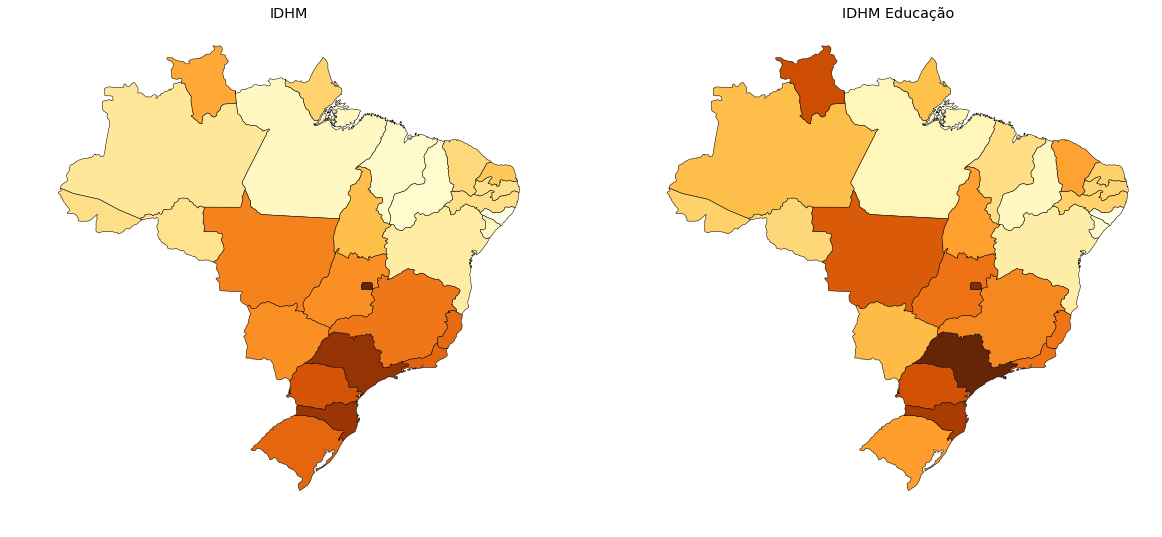

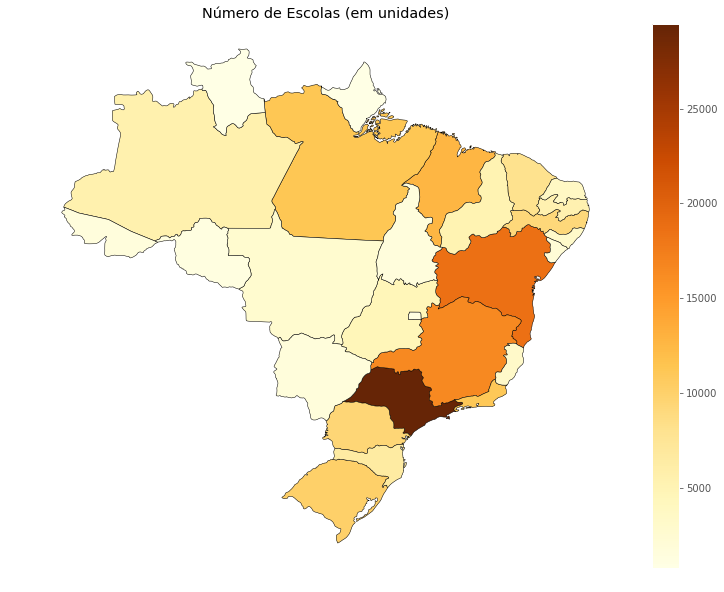

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1 = mapa_educacao_2015.plot(column='IDHM', ax=ax1, cmap='YlOrBr', edgecolor='black')
ax2 = mapa_educacao_2015.plot(column='IDHM_E', ax=ax2, cmap='YlOrBr', edgecolor='black')
_ = ax1.set_title('IDHM')
_ = ax2.set_title('IDHM Educação')
_ = ax1.axis('off')
_ = ax2.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='NUM_ESCOLAS', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Número de Escolas (em unidades)')
_ = ax.axis('off')

plt.show()

**Considerações:**<br>
De fato nos estados do sul e sudeste a hipótese parece verdadeira, porém na região nordeste vemos que há bastante escolas e isso não parece refletir no IDH e no IDH Educação, outro contraste é na região centro-oeste onde indica um número de escolas relativamente baixo em relação às outras regiões e mostra um IDH maior. A densidade demográfica pode ser um fator causando este fenônemo.

***
### Hipótese 02: Estados com maior taxa de escolas/população¹ tendem a possuir um IDH maior
¹*população usada no cálculo é a população de indivíduos em idade escolar (6 a 17 anos)*

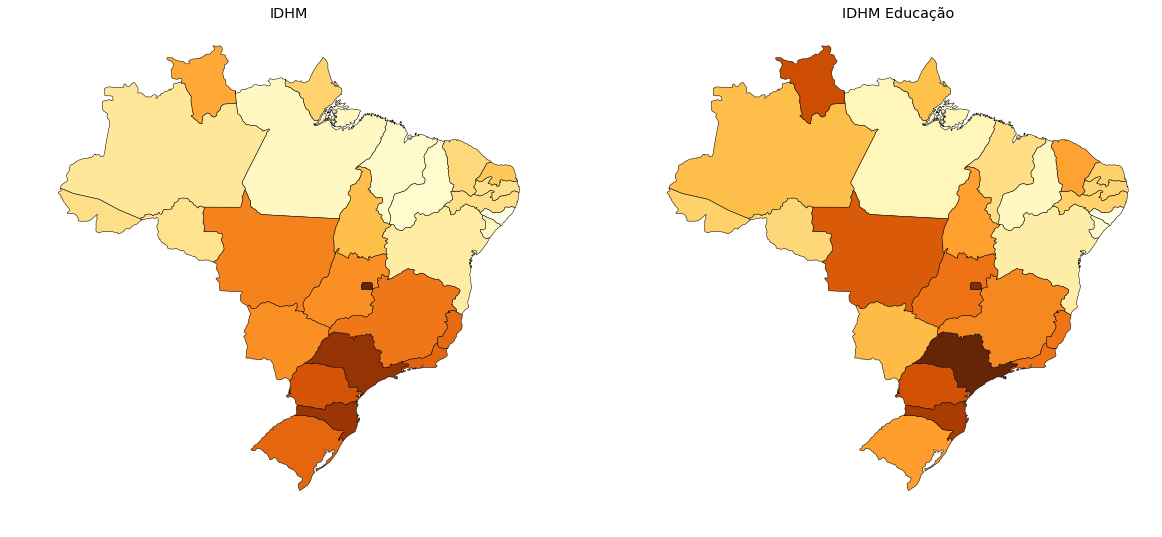

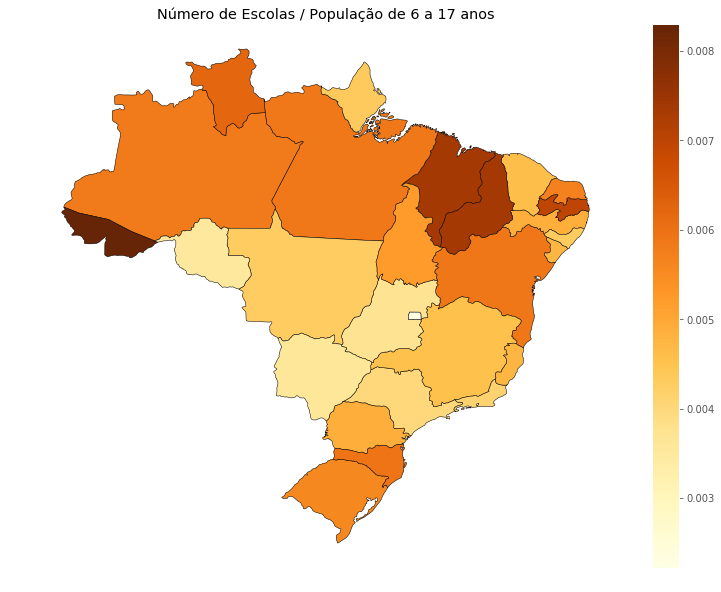

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1 = mapa_educacao_2015.plot(column='IDHM', ax=ax1, cmap='YlOrBr', edgecolor='black')
ax2 = mapa_educacao_2015.plot(column='IDHM_E', ax=ax2, cmap='YlOrBr', edgecolor='black')
_ = ax1.set_title('IDHM')
_ = ax2.set_title('IDHM Educação')
_ = ax1.axis('off')
_ = ax2.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/POP6A17', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Número de Escolas / População de 6 a 17 anos')
_ = ax.axis('off')

plt.show()

**Considerações:**<br>
A hipótese mostrou-se totalmente falha, pois a concentração dos maiores IDH estão na região sudeste, sul e centro-oeste, porém as taxas de escolas/população de 6 a 17 anos são maiores nas regiões norte e nordeste.

***
### Hipótese 03: Estados onde a taxa número de escolas/densidade demográfica é maior tendem a ter um IDH maior

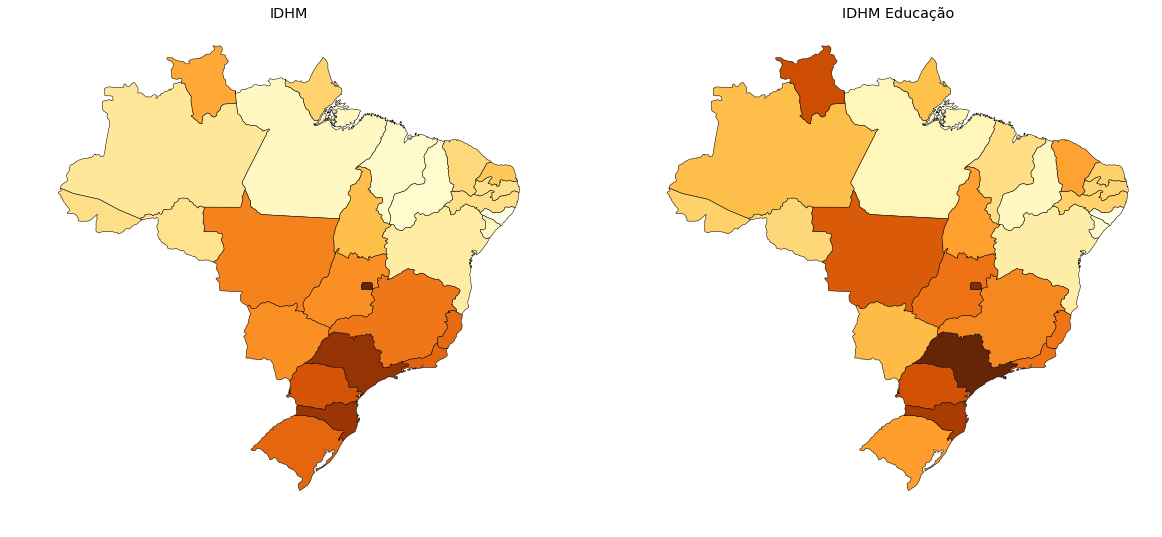

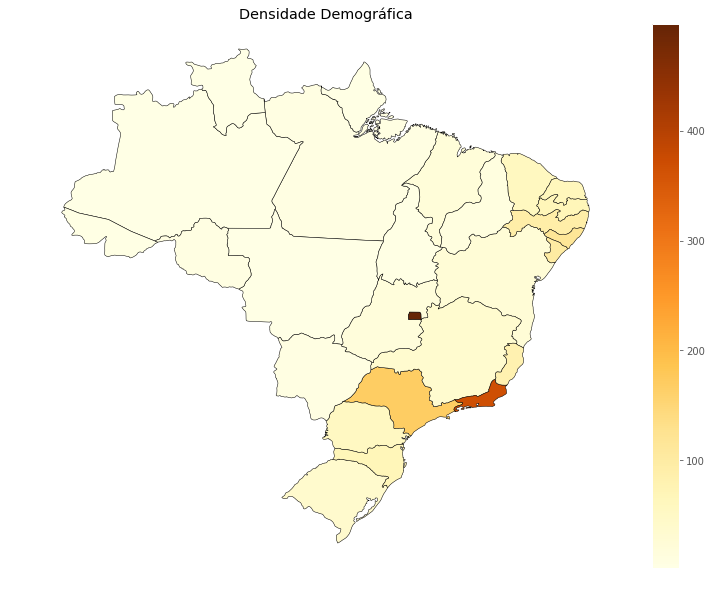

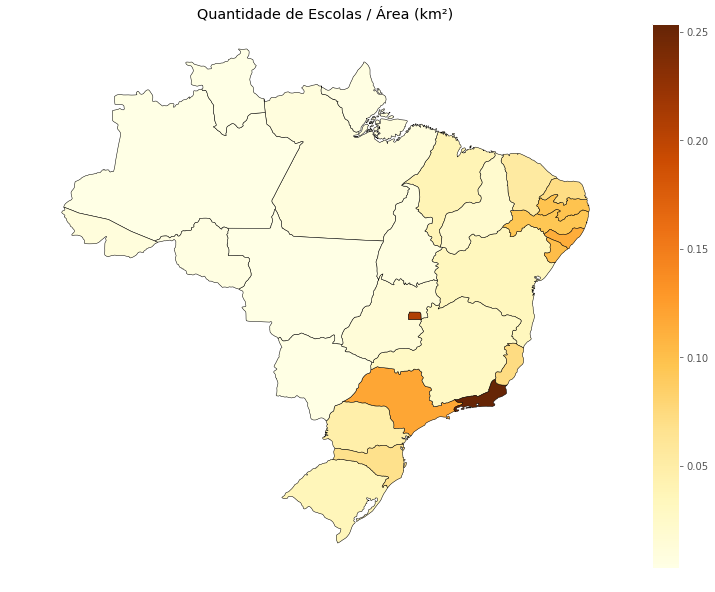

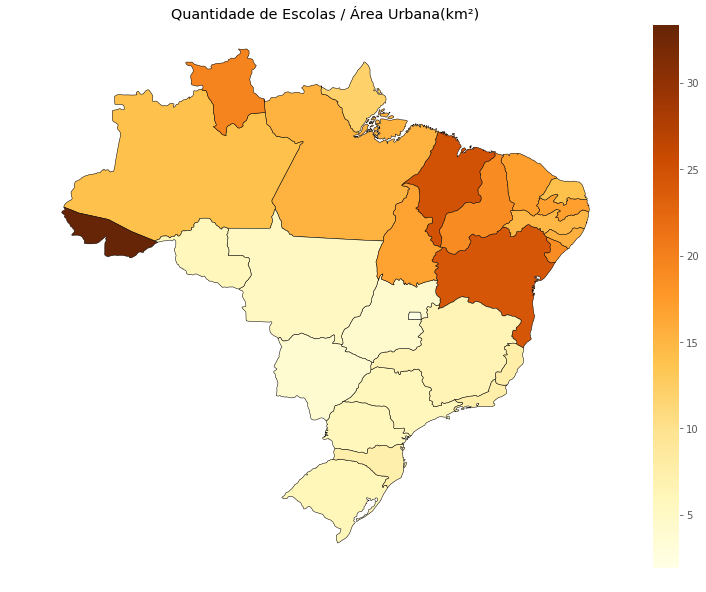

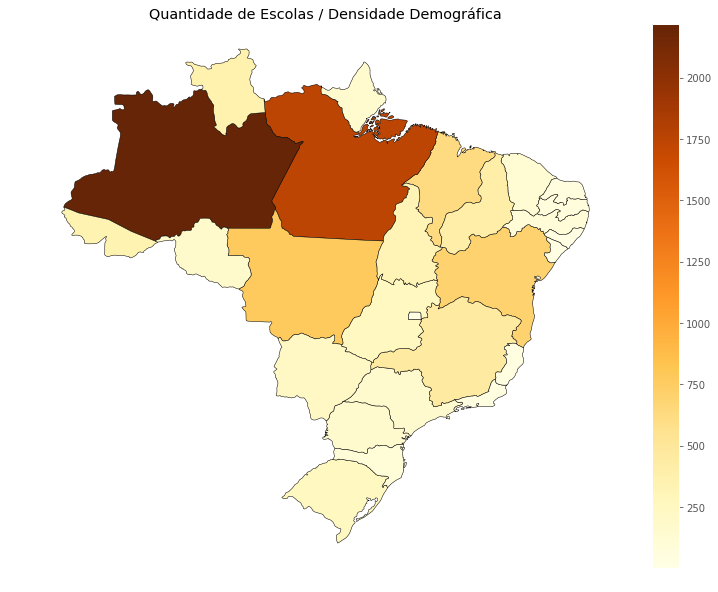

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1 = mapa_educacao_2015.plot(column='IDHM', ax=ax1, cmap='YlOrBr', edgecolor='black')
ax2 = mapa_educacao_2015.plot(column='IDHM_E', ax=ax2, cmap='YlOrBr', edgecolor='black')
_ = ax1.set_title('IDHM')
_ = ax2.set_title('IDHM Educação')
_ = ax1.axis('off')
_ = ax2.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='DENSDEMOTOT', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Densidade Demográfica')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/AREA', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Quantidade de Escolas / Área (km²)')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/AREAURB', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Quantidade de Escolas / Área Urbana(km²)')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/DENSDEMOTOT', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Quantidade de Escolas / Densidade Demográfica')
_ = ax.axis('off')

plt.show()

**Considerações:**<br>
Com os gráficos acima, podemos ver que a taxa de escolas é alta na região norte uma vez que a população total nessa região é menor.

***
### Hipótese 04: Estados onde tem mais frequência às escolas tendem a ter o IDH maior

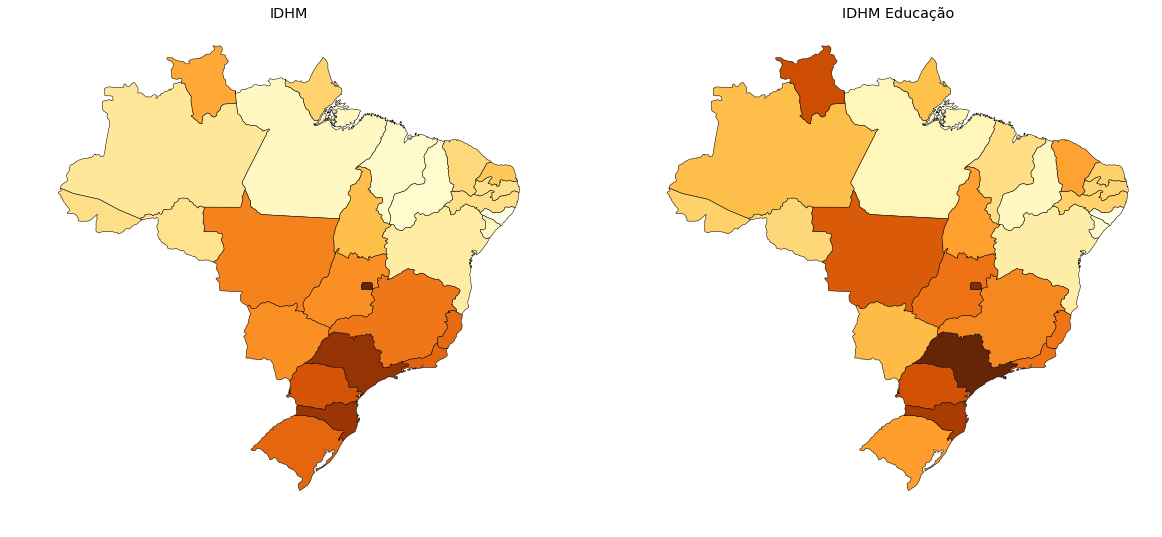

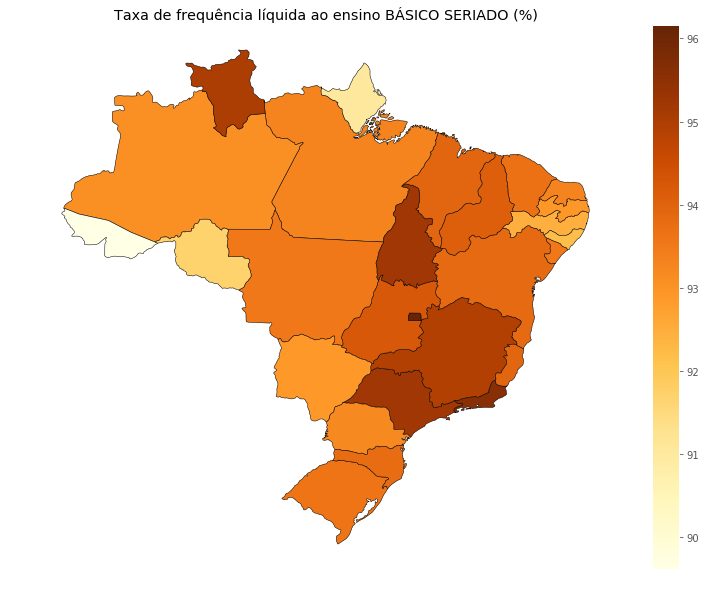

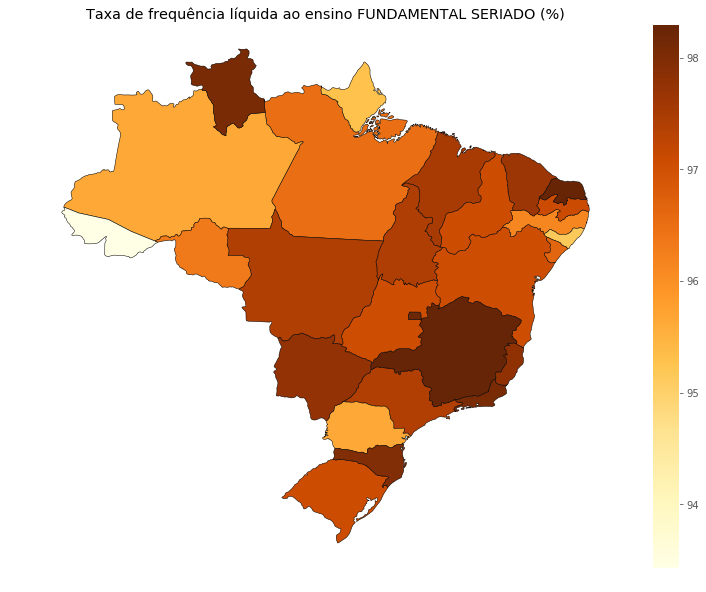

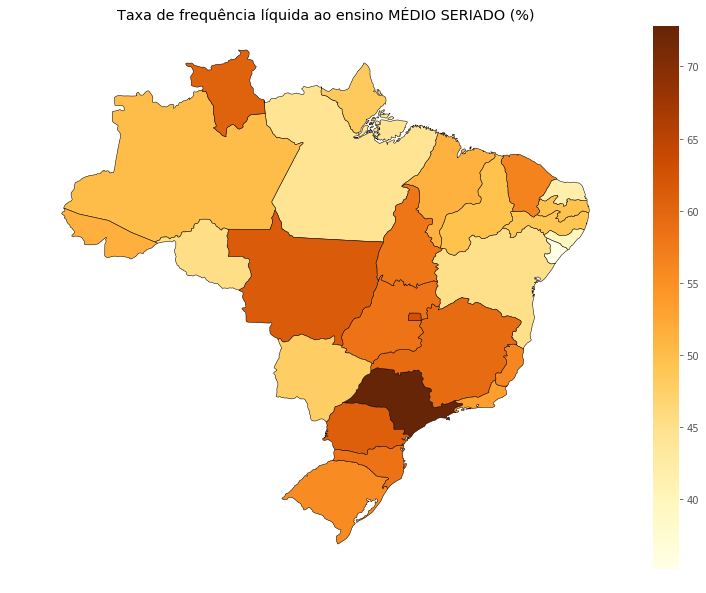

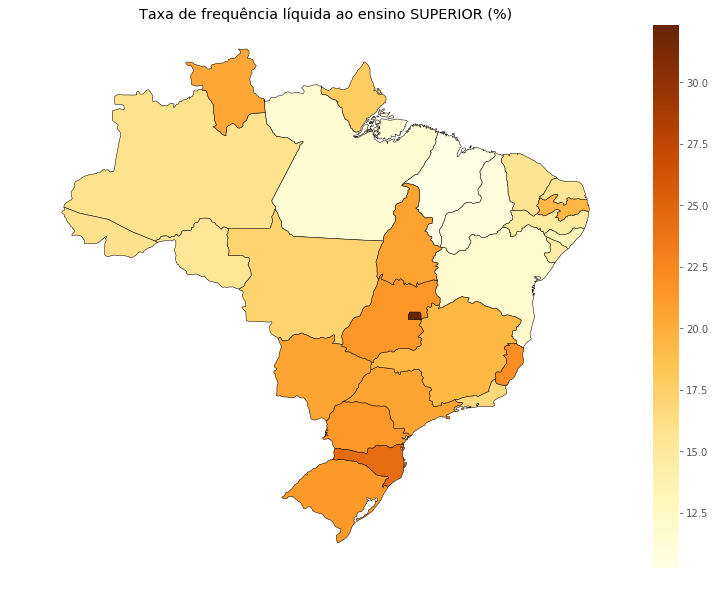

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1 = mapa_educacao_2015.plot(column='IDHM', ax=ax1, cmap='YlOrBr', edgecolor='black')
ax2 = mapa_educacao_2015.plot(column='IDHM_E', ax=ax2, cmap='YlOrBr', edgecolor='black')
_ = ax1.set_title('IDHM')
_ = ax2.set_title('IDHM Educação')
_ = ax1.axis('off')
_ = ax2.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLBAS', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino BÁSICO SERIADO (%)')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLFUND', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino FUNDAMENTAL SERIADO (%)')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLMED', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino MÉDIO SERIADO (%)')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLSUPER', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino SUPERIOR (%)')
_ = ax.axis('off')

plt.show()

**Considerações:**<br>
A hipótese parece verdadeira, nos estados onde a frequência às escolas tende a se manter conforme avança o nível de ensino foram os mesmos que indicaram um IDH maior.

### Hipótese 05: Quanto maior o nível de escolaridade das pessoas maior é o IDH da UF.

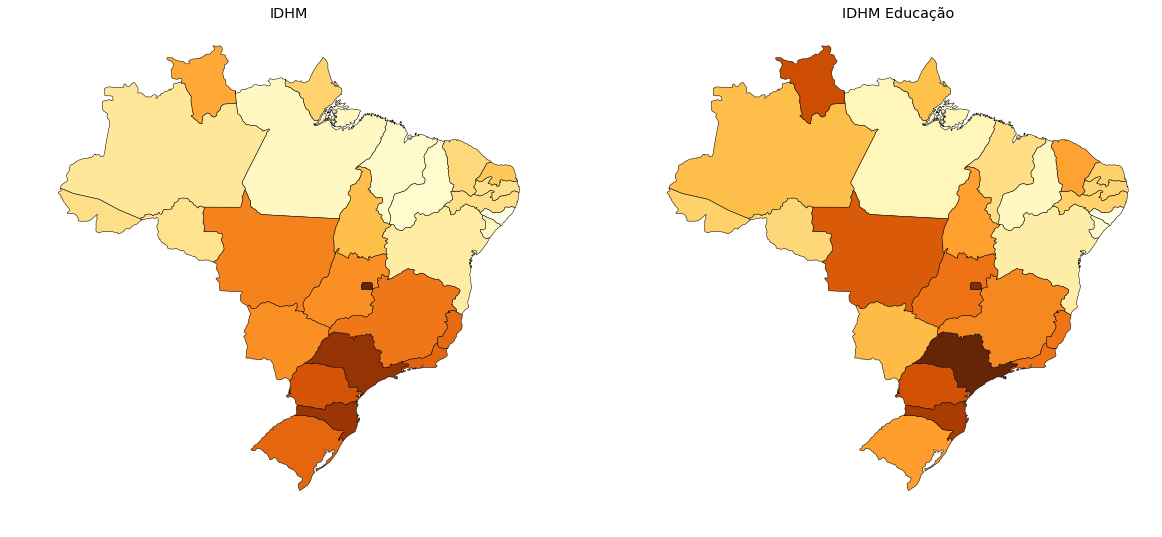

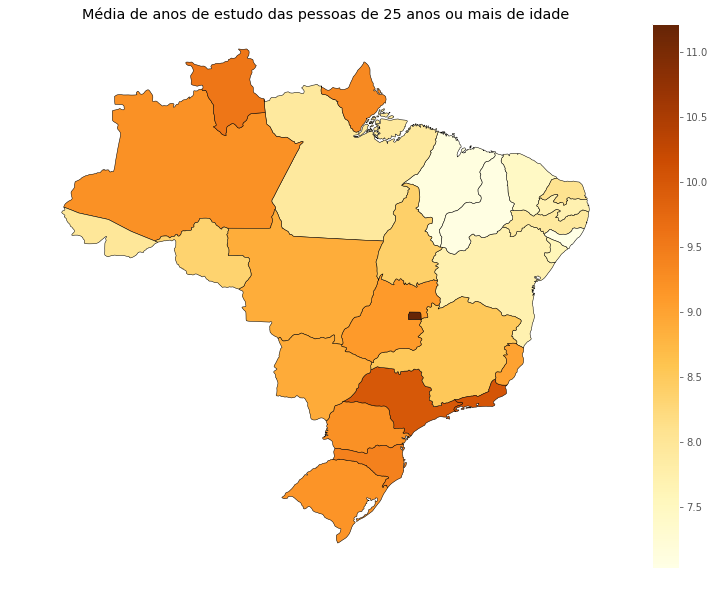

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1 = mapa_educacao_2015.plot(column='IDHM', ax=ax1, cmap='YlOrBr', edgecolor='black')
ax2 = mapa_educacao_2015.plot(column='IDHM_E', ax=ax2, cmap='YlOrBr', edgecolor='black')
_ = ax1.set_title('IDHM')
_ = ax2.set_title('IDHM Educação')
_ = ax1.axis('off')
_ = ax2.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ANOSEST', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Média de anos de estudo das pessoas de 25 anos ou mais de idade')
_ = ax.axis('off')

plt.show()

In [60]:
mapa_educacao_2015['ANOSEST'].describe()

count    27.000000
mean      8.590741
std       1.024597
min       7.030000
25%       7.815000
50%       8.530000
75%       9.225000
max      11.210000
Name: ANOSEST, dtype: float64

**Considerações** <br>
A hipótese parece verdadeira, pois mesmo com uma variabilidade relativamente baixa percebe-se um padrão muito semelhante ao padrão do IDH.

### Hipótese 06: Nos estados onde possuem menos escolas por população em idade escolar (6 a 17 anos) a taxa de analfabetismo é maior.

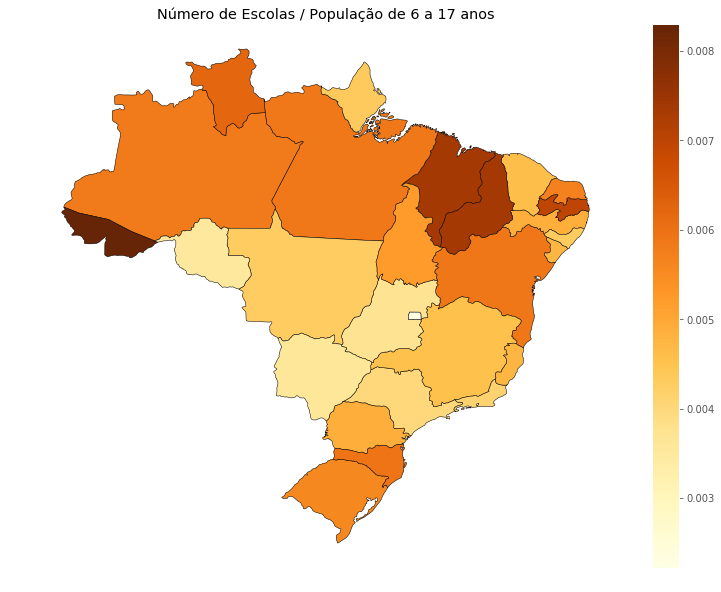

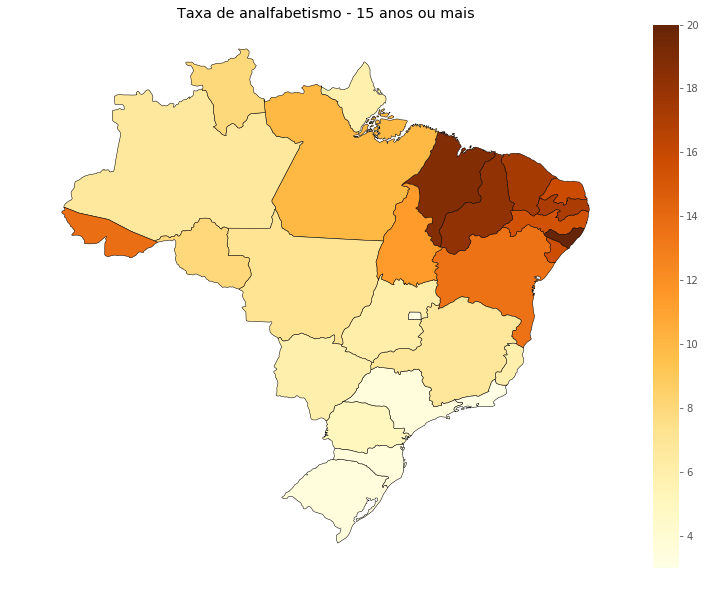

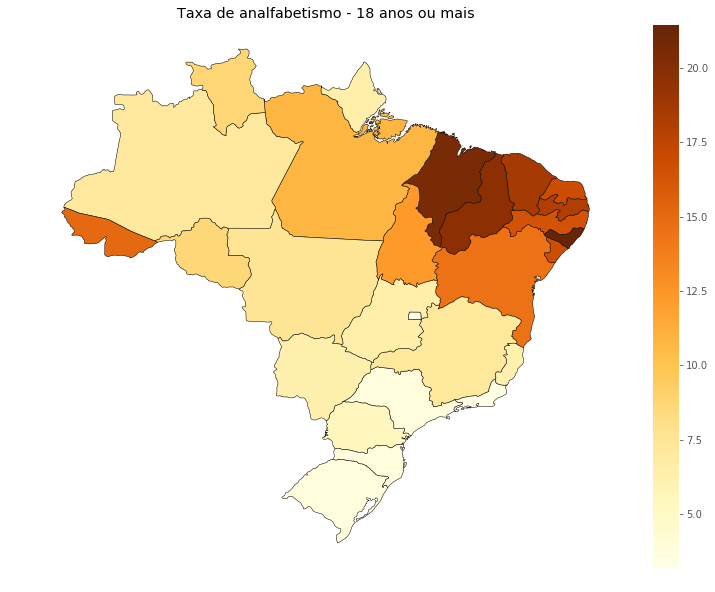

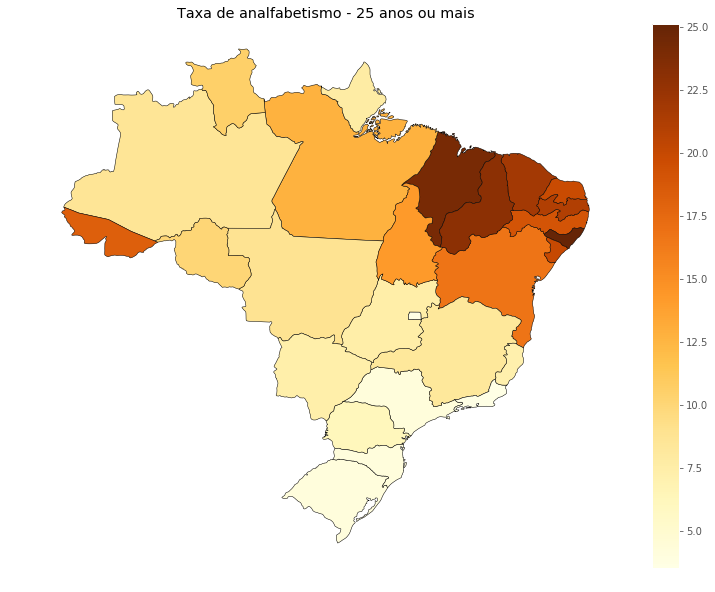

In [61]:
fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/POP6A17', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Número de Escolas / População de 6 a 17 anos')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_ANALF15M', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de analfabetismo - 15 anos ou mais')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_ANALF18M', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de analfabetismo - 18 anos ou mais')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_ANALF25M', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de analfabetismo - 25 anos ou mais')
_ = ax.axis('off')

plt.show()

**Considerações** <br>
A hipótese é falha, vemos o contraste na região nordeste onde a taxa de analfabetismo e a taxa de escolas por população em idade escolar são altas.

In [62]:
mapa_educacao_2015

UF  NUM_ESCOLAS    POPTOT  POP6A17   IDHM  IDHM_E  I_ESCOLARIDADE  \
0   SP        29443  42074767  7345010  0.819   0.810           0.720   
1   BA        18597  14984863  3153150  0.698   0.628           0.537   
2   MG        16539  20680736  3634776  0.769   0.710           0.580   
3   MA        12701   6681109  1726450  0.677   0.648           0.521   
4   PA        11270   8048141  1922224  0.682   0.616           0.556   
5   RJ        11096  16115050  2678996  0.779   0.724           0.726   
6   RS        10165  10988987  1824623  0.778   0.696           0.606   
7   PR         9511  10930980  1948163  0.790   0.749           0.649   
8   PE         9260   9217551  1889463  0.710   0.658           0.552   
9   CE         8149   8688588  1771921  0.715   0.692           0.546   
10  SC         6527   6589516  1097774  0.816   0.773           0.672   
11  AM         5524   3882818   949697  0.703   0.674           0.662   
12  PB         5486   3923954   785439  0.709   0.655           0.553   
13  PI         5263   3180772   714273  0.675   0.611           0.494   
14  GO         4659   6443217  1251460  0.756   0.724           0.640   
15  RN         3790   3409386   666180  0.725   0.658           0.557   
16  ES         3347   3832617   704637  0.777   0.723           0.633   
17  AL         3169   3265050   733055  0.663   0.586           0.477   
18  MT         2731   3192204   636245  0.763   0.742           0.647   
19  SE         2233   2215321   470718  0.681   0.601           0.523   
20  MS         1726   2640988   478521  0.756   0.676           0.605   
21  TO         1683   1463154   322924  0.732   0.694           0.594   
22  AC         1653    789380   199175  0.710   0.658           0.615   
23  RO         1328   1755648   374465  0.708   0.653           0.573   
24  DF         1200   2872689   540981  0.839   0.794           0.798   
25  AP          840    763810   193646  0.719   0.672           0.692   
26  RR          799    489524   128928  0.743   0.753           0.697   

    I_FREQ_PROP  ANOSEST  T_ANALF15M          ...           REGIAO  \
0         0.859     9.99        3.53          ...               SE   
1         0.679     7.71       13.52          ...               NE   
2         0.785     8.53        6.79          ...               SE   
3         0.723     7.12       18.81          ...               NE   
4         0.648     7.92        9.94          ...               NO   
5         0.724    10.03        3.02          ...               SE   
6         0.746     9.18        3.53          ...               SU   
7         0.805     9.22        5.11          ...               SU   
8         0.719     7.92       15.36          ...               NE   
9         0.779     7.44       17.33          ...               NE   
10        0.828     9.43        3.53          ...               SU   
11        0.680     9.23        6.67          ...               NO   
12        0.713     7.71       17.13          ...               NE   
13        0.679     7.07       18.18          ...               NE   
14        0.770     9.12        6.09          ...               CO   
15        0.716     8.09       15.77          ...               NE   
16        0.773     9.02        5.95          ...               SE   
17        0.649     7.03       20.01          ...               NE   
18        0.796     8.88        7.12          ...               CO   
19        0.645     7.59       15.63          ...               NE   
20        0.714     8.90        5.98          ...               CO   
21        0.751     8.39       11.43          ...               NO   
22        0.681     7.98       13.76          ...               NO   
23        0.697     8.35        8.01          ...               NO   
24        0.792    11.21        3.00          ...               CO   
25        0.662     9.32        5.89          ...               NO   
26        0.783     9.57        7.96          ...               NO   

In [63]:
mapa_educacao_2015.columns

Index(['UF', 'NUM_ESCOLAS', 'POPTOT', 'POP6A17', 'IDHM', 'IDHM_E',
       'I_ESCOLARIDADE', 'I_FREQ_PROP', 'ANOSEST', 'T_ANALF15M', 'T_ANALF18M',
       'T_ANALF25M', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS',
       'T_FLFUND', 'T_FLMED', 'T_FLSUPER', 'T_FREQ15A17', 'T_FREQ18A24',
       'T_FREQ5A6', 'T_FREQ6A14', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M',
       'ESTADO', 'REGIAO', 'geometry', 'AREA_KM2', 'AREAURB_KM2',
       'ESCOLAS/POP', 'ESCOLAS/POP6A17', 'DENSDEMOTOT', 'DENSDEMO6A17',
       'ESCOLAS/AREAURB', 'ESCOLAS/DENSDEMO6A17'],
      dtype='object')

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


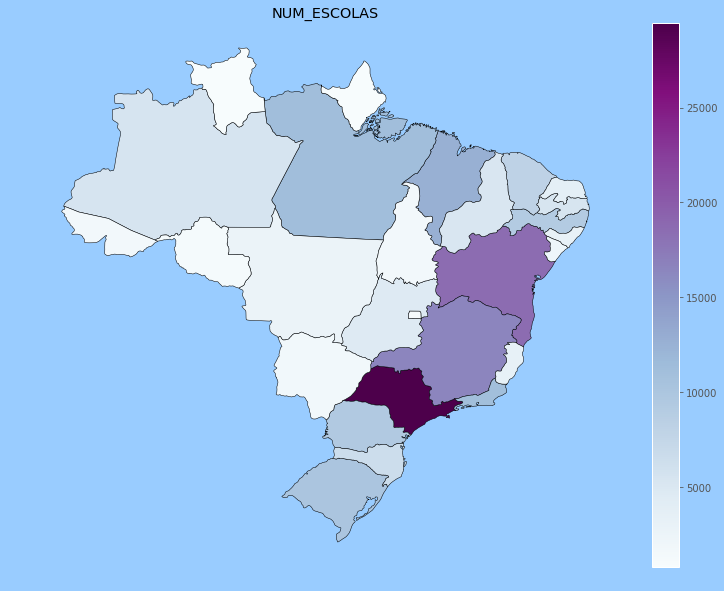

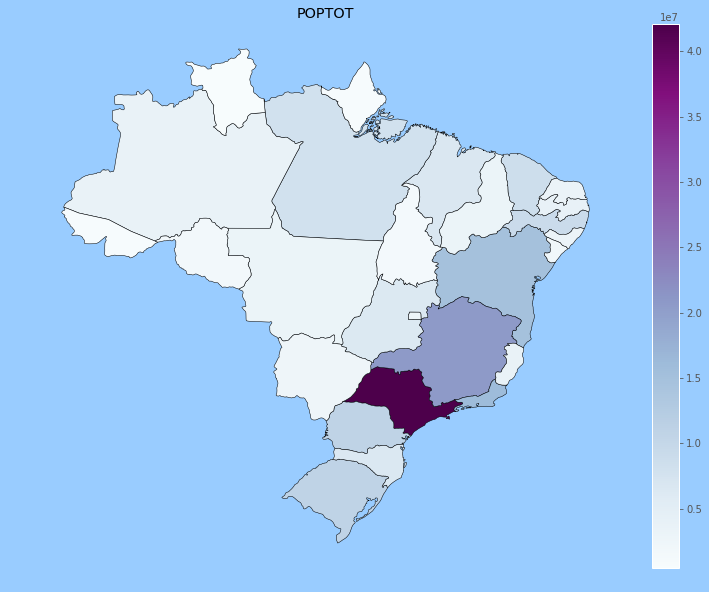

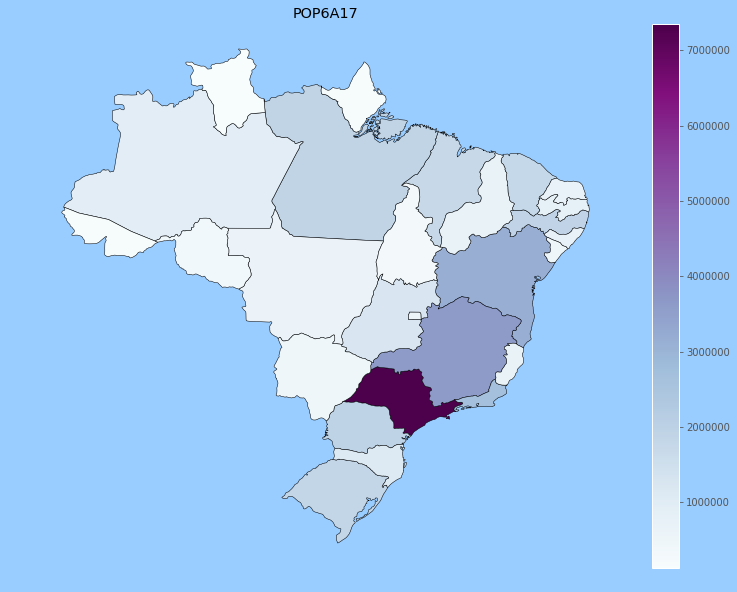

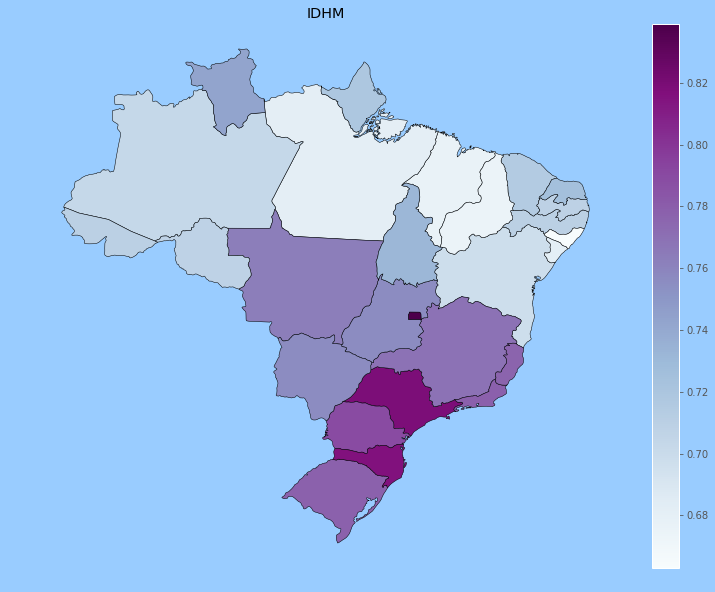

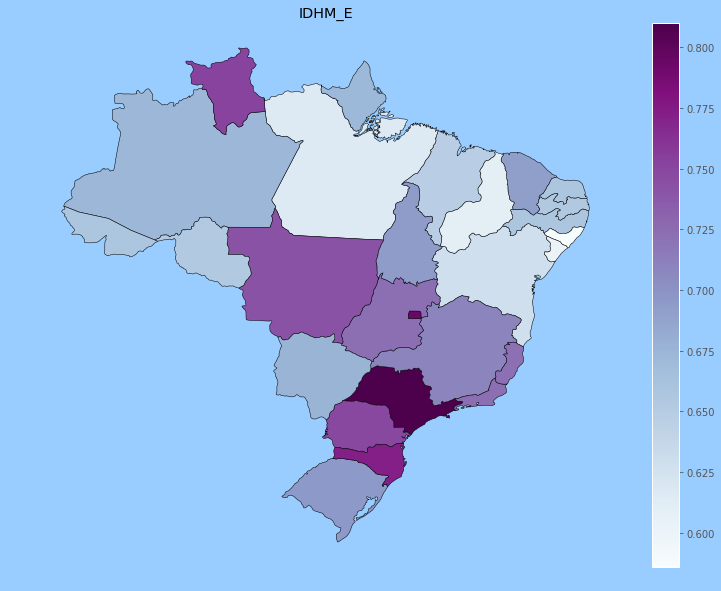

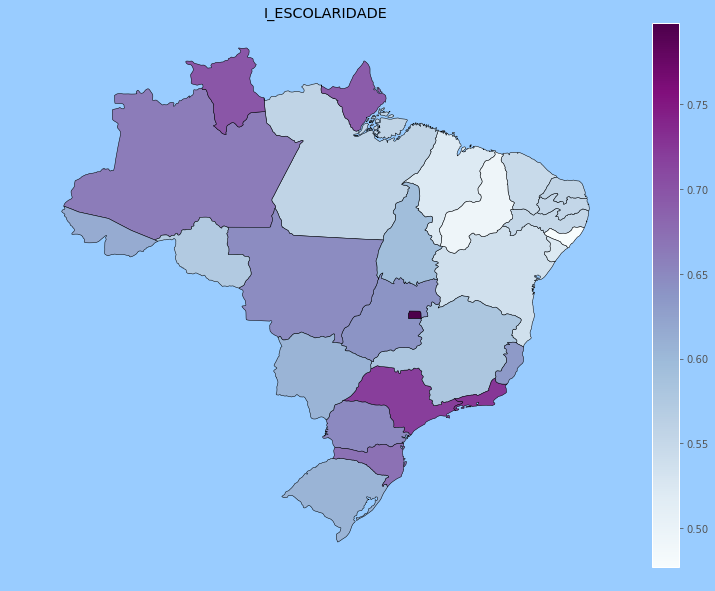

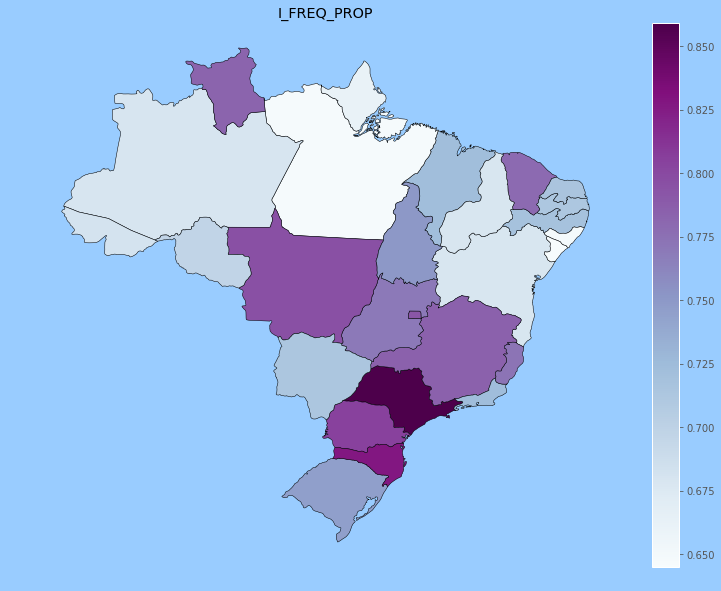

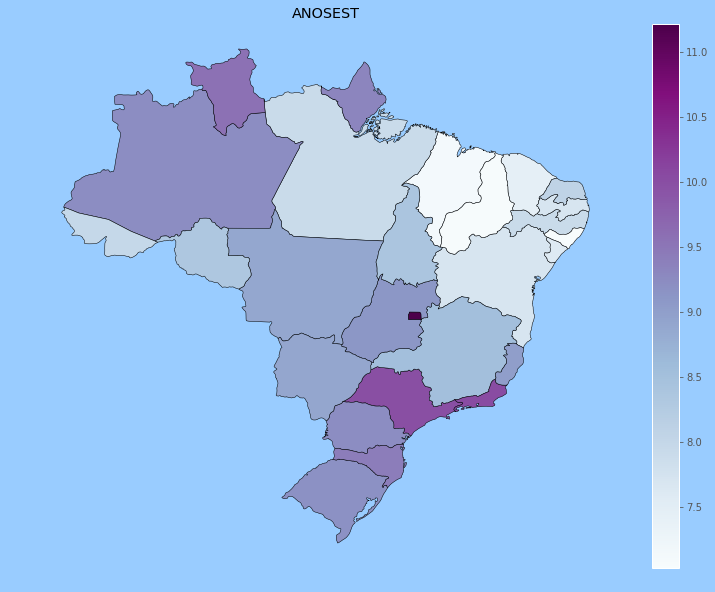

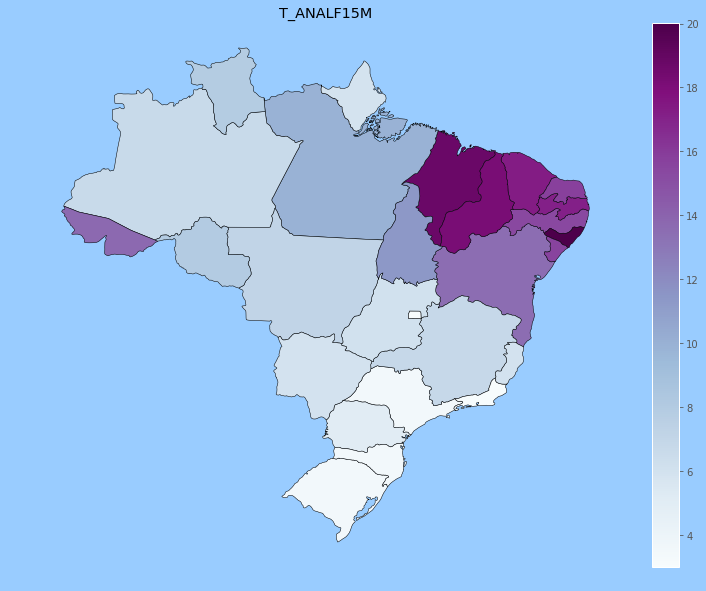

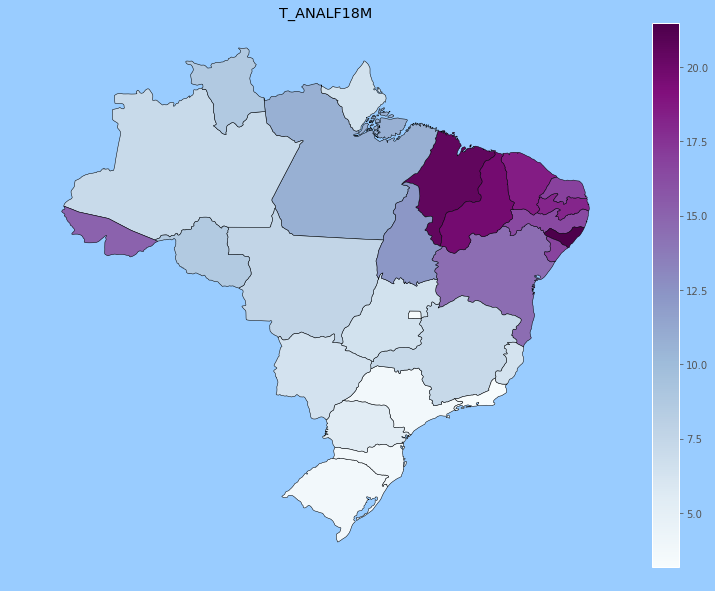

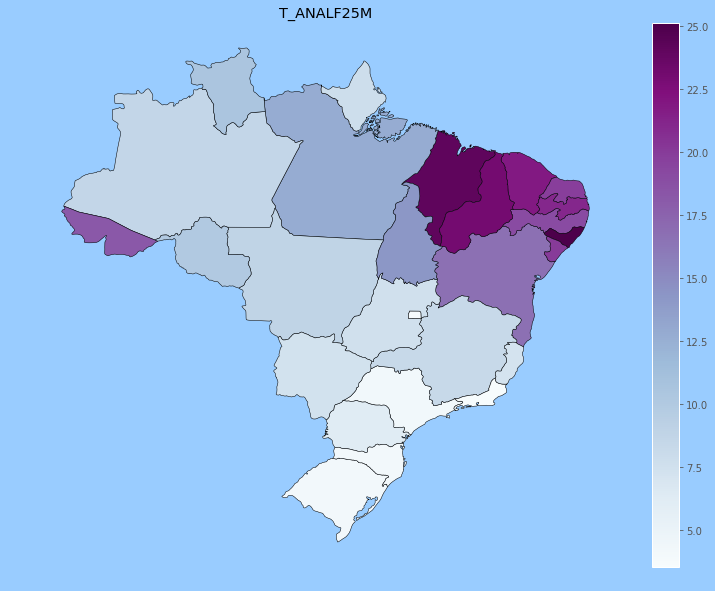

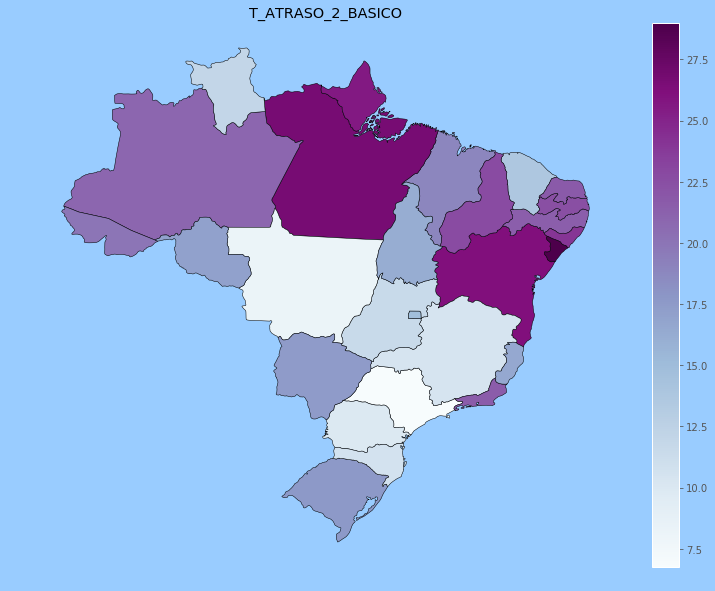

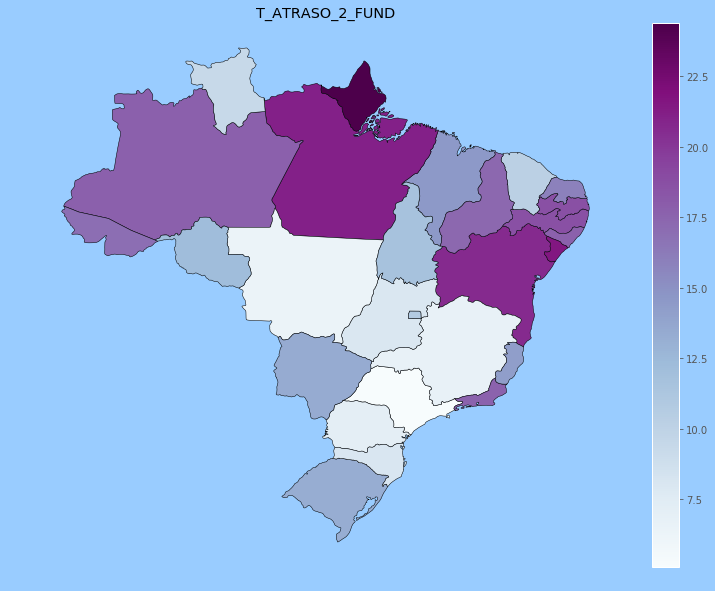

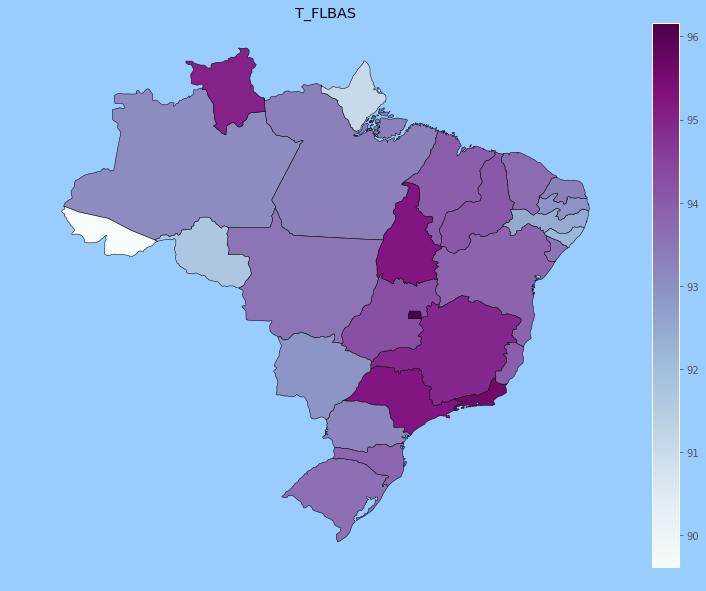

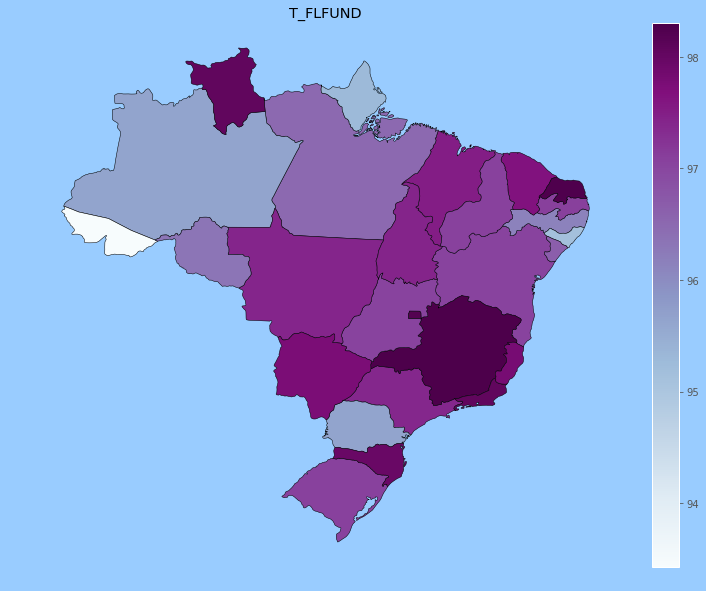

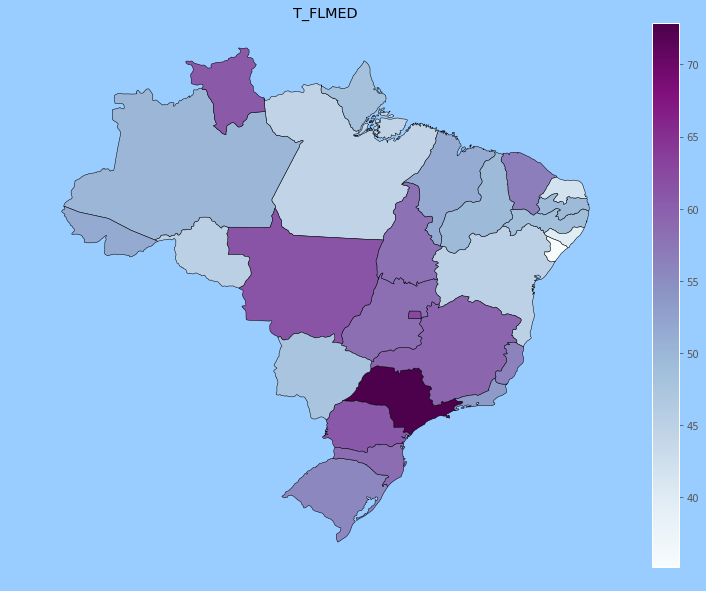

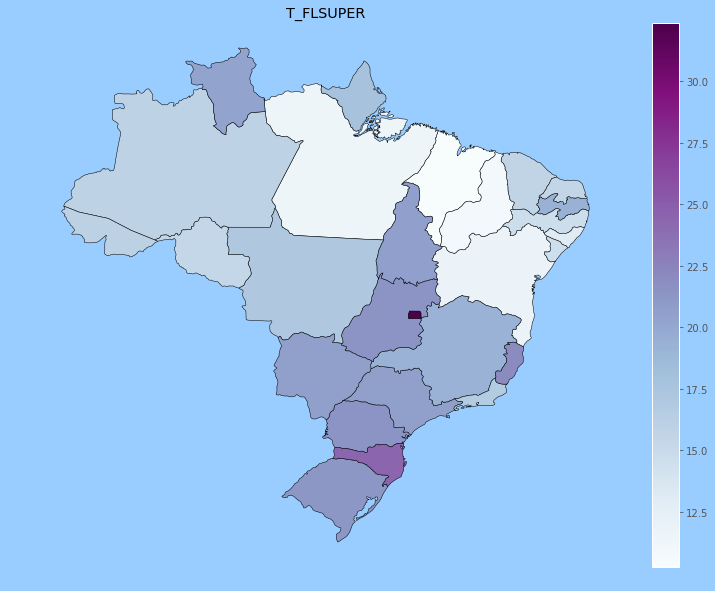

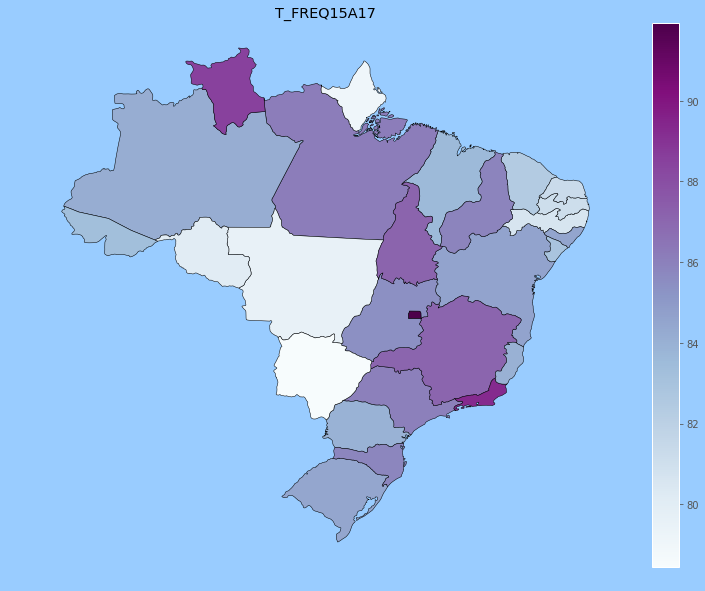

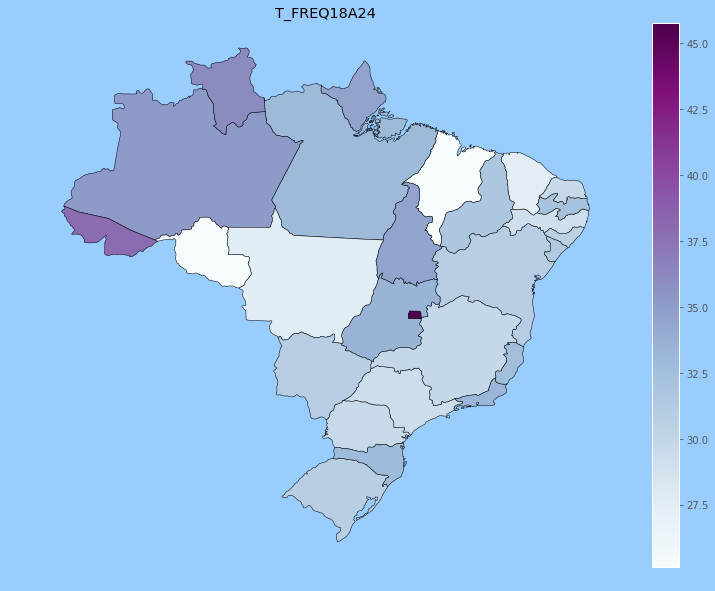

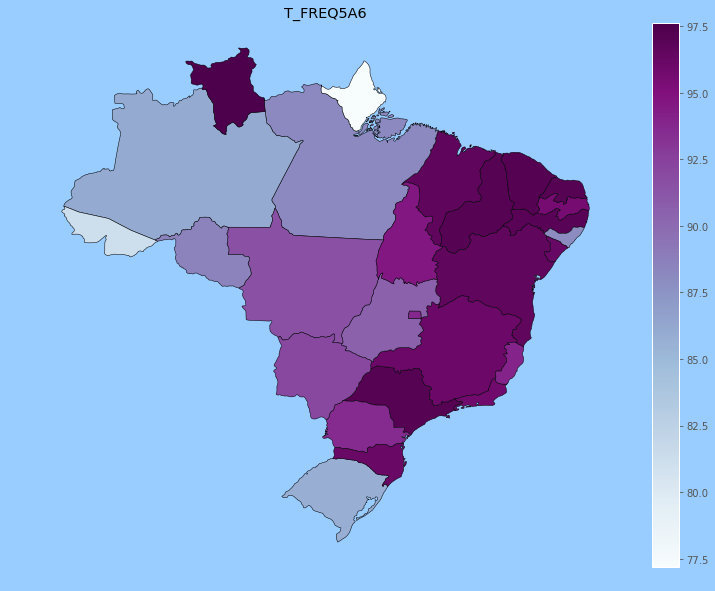

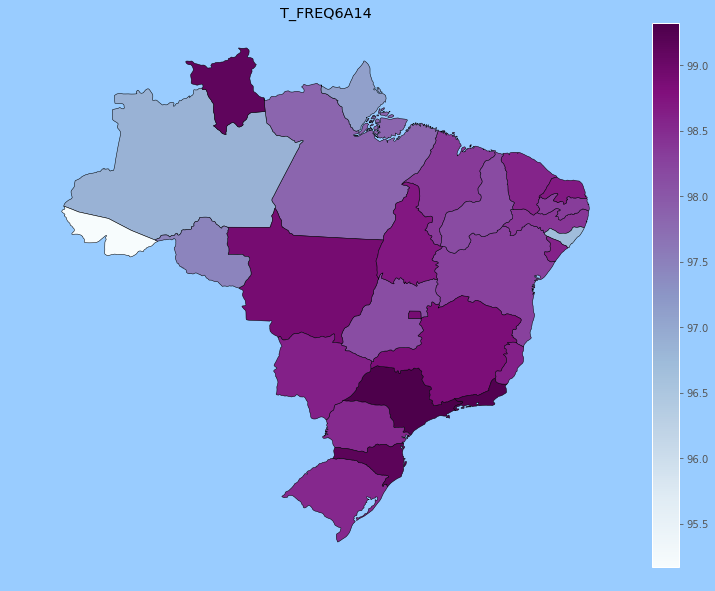

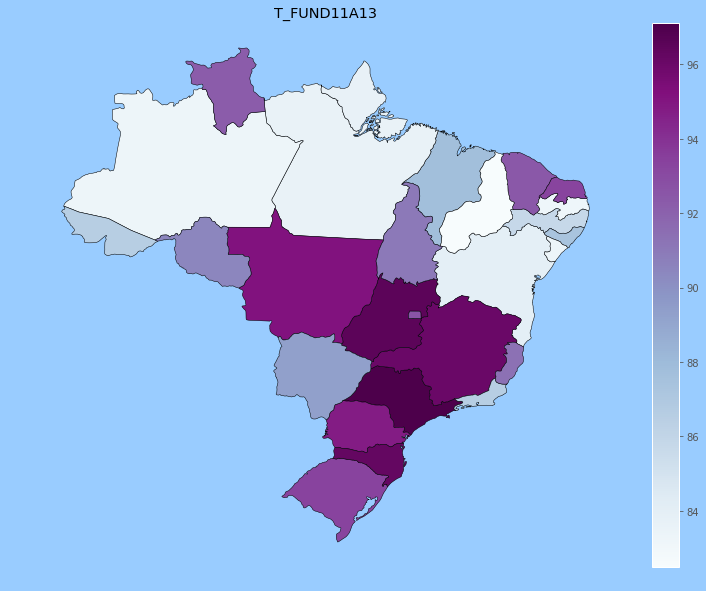

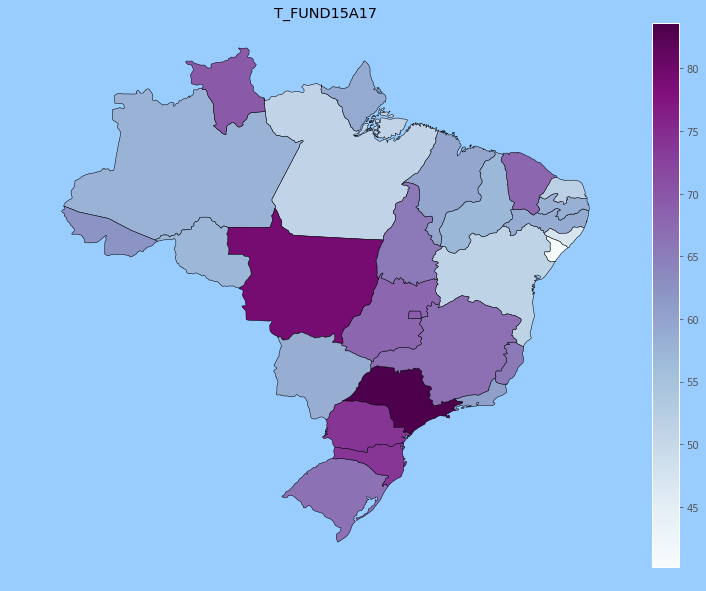

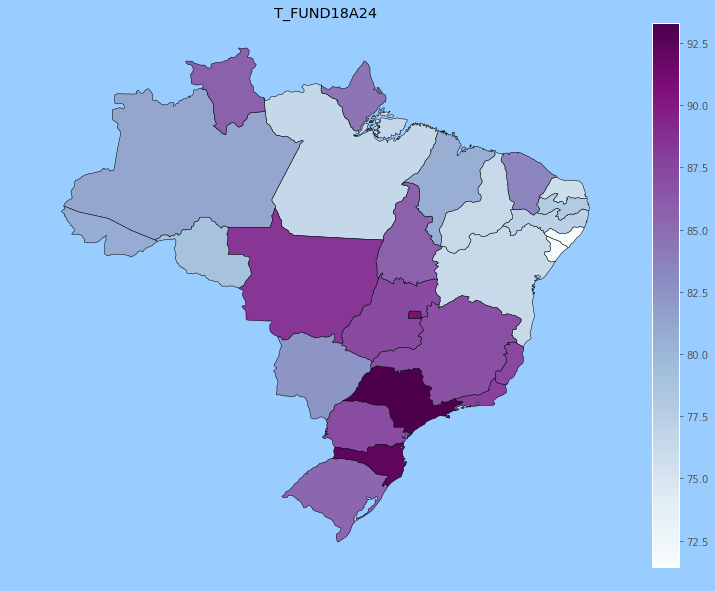

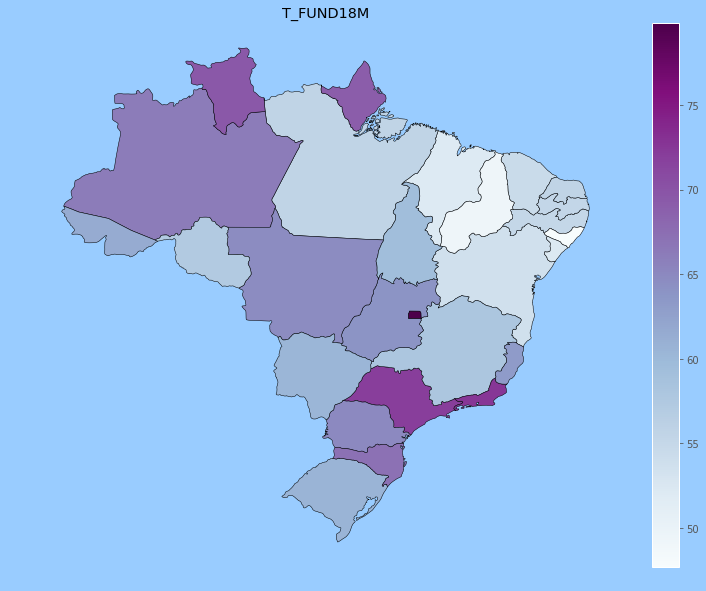

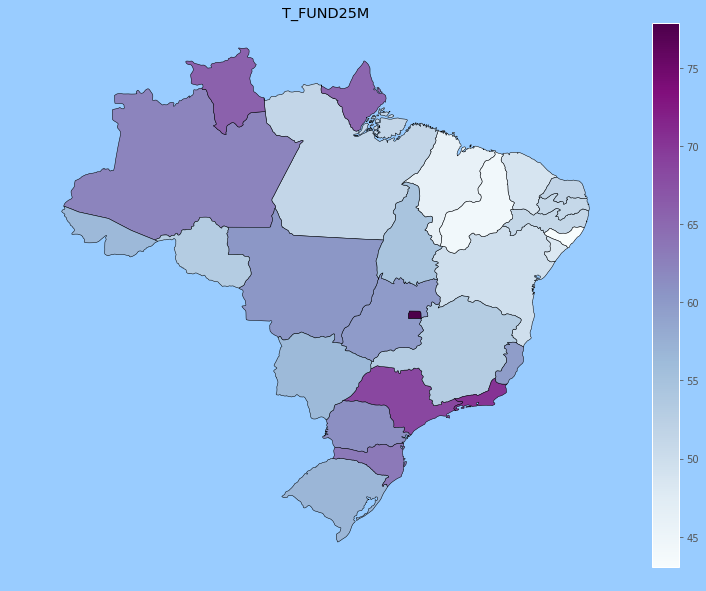

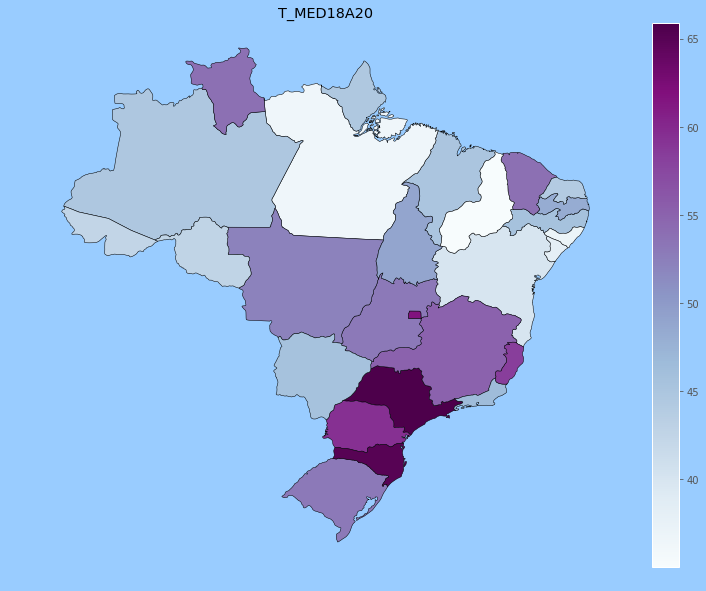

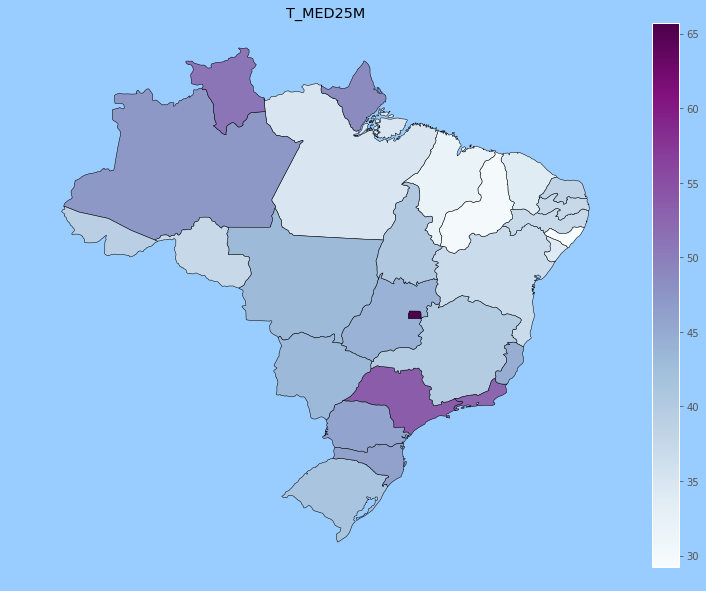

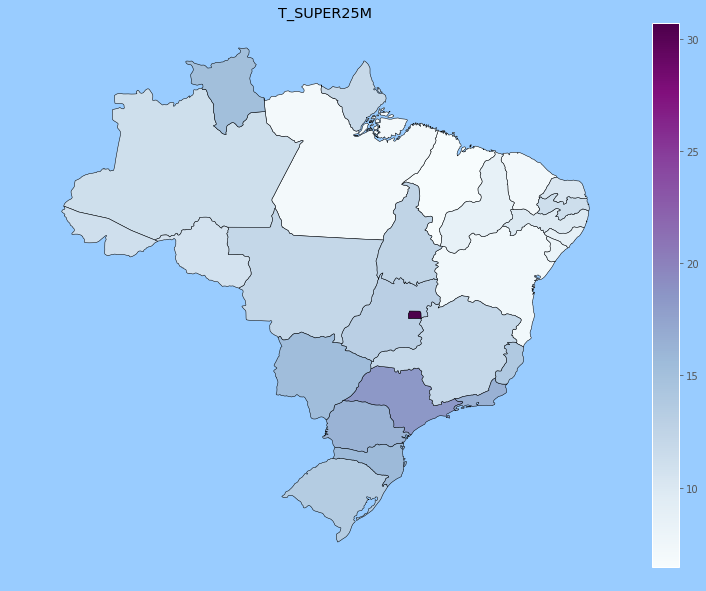

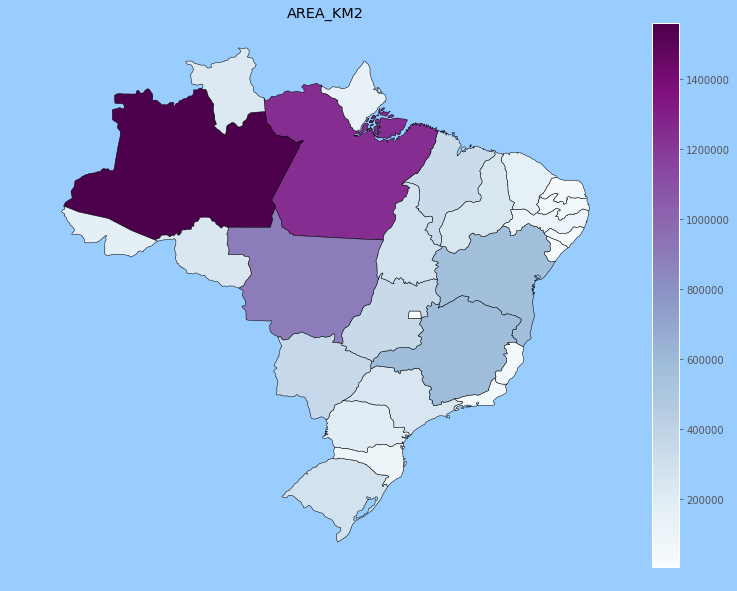

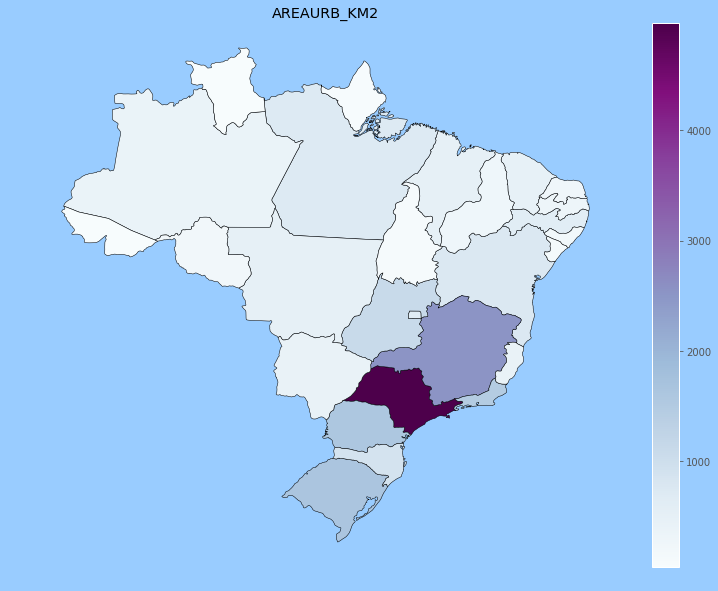

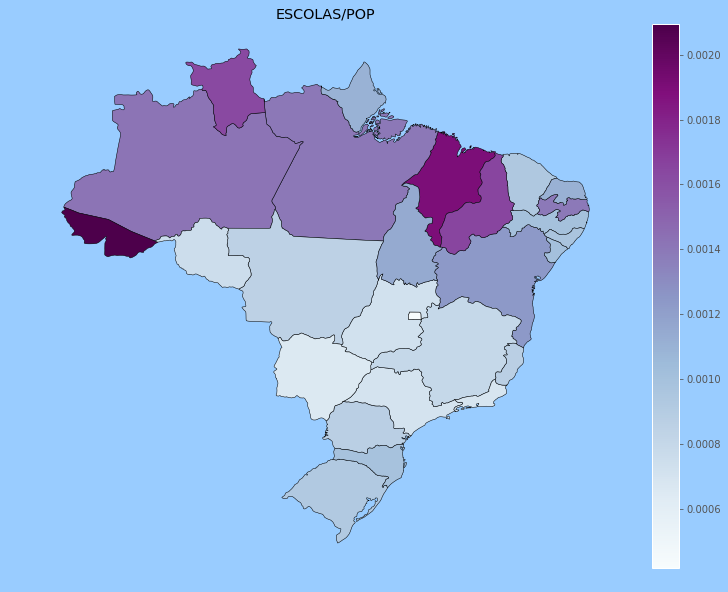

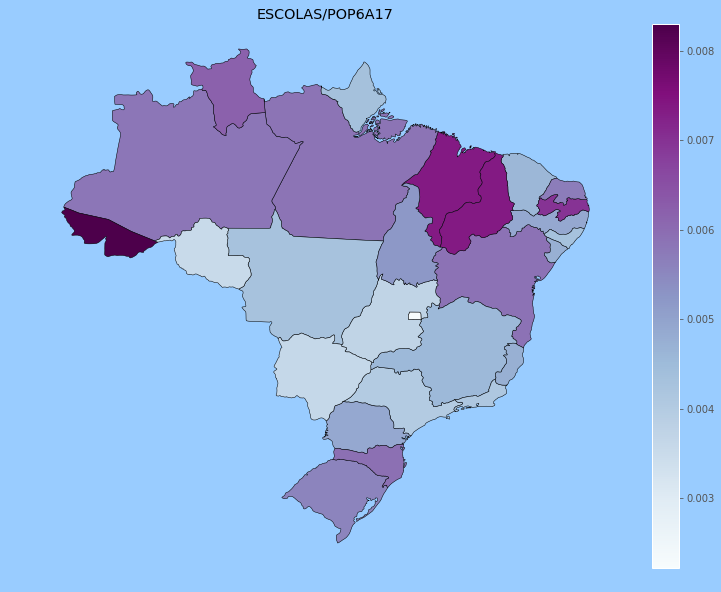

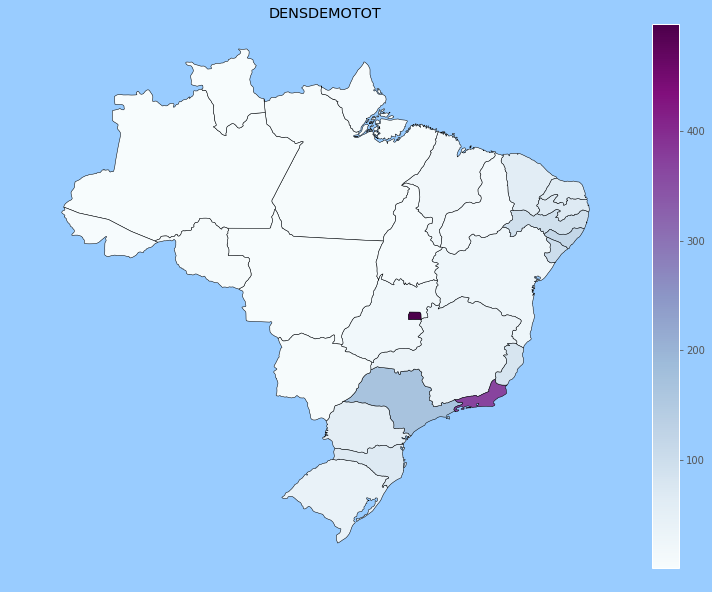

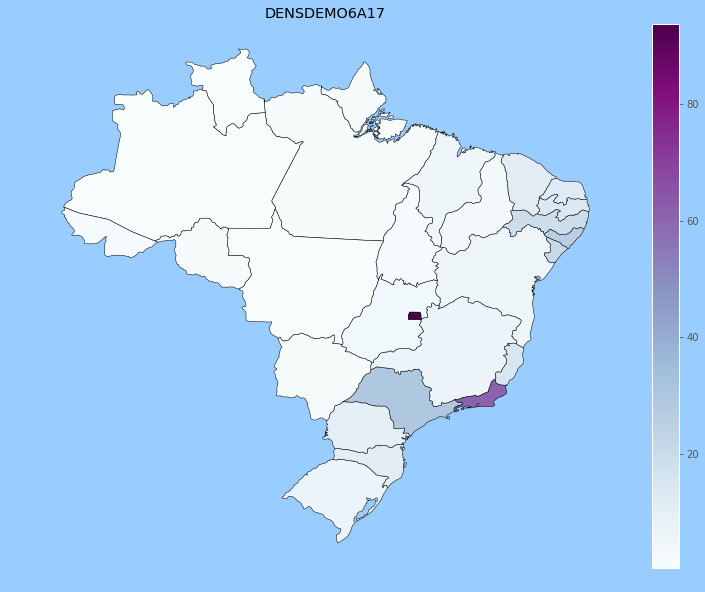

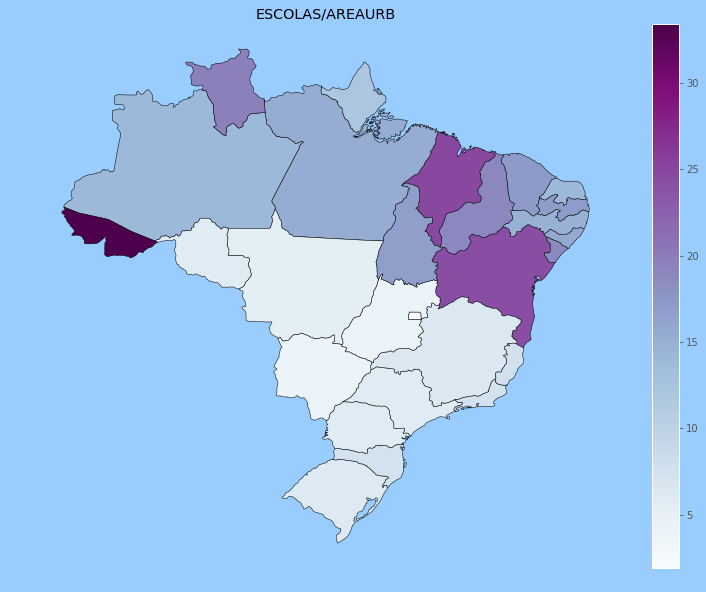

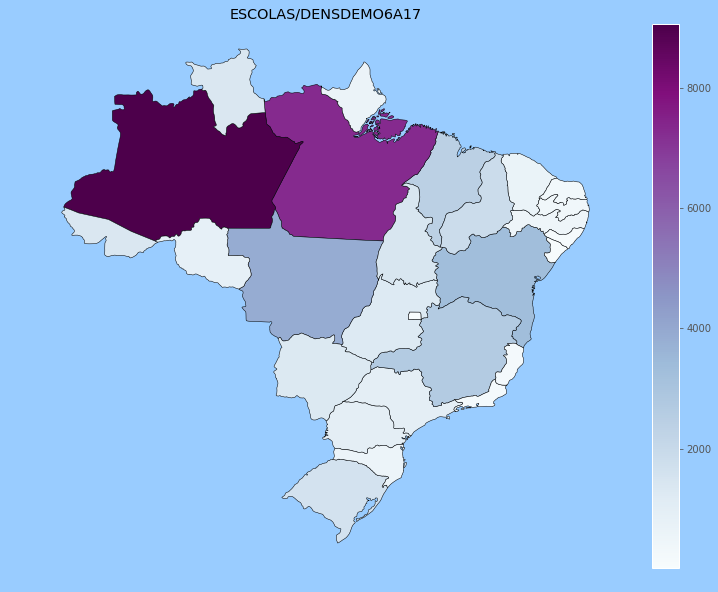

In [64]:
for col in mapa_educacao_2015.columns.drop(['UF', 'ESTADO', 'REGIAO', 'geometry']):
    fig, ax = plt.subplots(figsize=(13, 10), facecolor=(0.6, 0.8, 1))
    _ = mapa_educacao_2015.plot(column=col, ax=ax, cmap='BuPu', legend=True, edgecolor='black')
    _ = plt.axis('off')
    _ = plt.title(col)